# Imports

In [682]:
import pandas as pd 
import numpy as np
import tabulate as tbl
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
pd.options.mode.chained_assignment = None
# pd.set_option('display.float_format', '{:.2f}'.format)


# Introdução

Aqui será realizado a leitura da base de dados e o tratamento das suas linhas

In [683]:
parquet_file = './database/payments.parquet3'

Parametros para o Matplotlib. 

In [684]:
COLOR = 'black'
WEIGHT = "bold"
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['font.weight'] = WEIGHT
plt.rcParams['axes.titleweight'] = WEIGHT
plt.style.use('ggplot')

Ao ler o arquivo do projeto, é importante verificarmos o estado da base e como estão os detalhes de saúde do projeto.

Ex: linhas com valores nulos, não únicos e afins. 

In [685]:
paymentTable = pd.read_parquet(parquet_file, engine='pyarrow')
describe = paymentTable.describe(include='all')
summary = paymentTable.isna().sum().to_frame('quantity')


In [686]:
paymentTable

,id,account_id,device_id,installation_id,timestamp,device_age_ms,n_accounts_by_device_30d,value,sum_values_by_device_30d,sum_values_by_device_3d,sum_values_by_installation_30d,sum_values_by_installation_3d,low_geo_chargeback_rate_30d,medium_geo_chargeback_rate_30d,high_geo_chargeback_rate_30d,chargedback
0,103262188752,Qg1D8ImiasT1avXL,7MkfhkrM5b0zCXzO,MR8p/uS6dEX1KlLX,1628347177114.00,6145809465.00,1.00,111.78,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00
1,103262188753,7oDcXhI2gc9IY/O2,64aUkvZXE0l7rRYB,lkZEByfr7JB81M0z,1631746300532.00,9177265601.00,1.00,137.11,2602.66,92.81,2602.66,92.81,0.00,0.00,0.00,0.00
2,103262188754,yCnksj2py9afMuyJ,j9MxfU8zaJSBAJJB,KwB8eOTyu/c1X/vo,1625328607782.00,11928029769.00,0.00,145.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,103262188755,UdU8Tz5Vaqw4wpCH,GgWDCBqCa09125xz,/7CONsK63eeDR+bg,1626373613876.00,4149963218.00,NaN,85.14,NaN,NaN,57.93,0.00,0.00,0.00,0.00,0.00
4,103262188756,zwb2WB1zI75ku8Z0,Hulxshcopdyf7gaA,qrvdkJ49Ej/kCgdu,1625593458071.00,155811043.00,1.00,189.25,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648168,678787812880,2FZYxaEsDL9KAS1N,D0uSI5BM3tlswAFE,u6H2d03dYfiKSl+h,1624784167610.00,11658893490.00,1.00,67.40,358.71,0.00,358.71,0.00,0.01,0.00,0.00,0.00
648169,678787812881,Xws5QLQvwGt+ZBQF,itiuc5Pt5qvI7MNA,TTM0TWuxzjZOEiqr,1632059013109.00,13133326887.00,0.00,135.62,6144.87,2331.77,6888.40,2331.77,0.00,0.00,0.00,0.00
648170,678787812882,W8KG4v5XqoU8m8bq,GgWDCBqCa09125xz,yJhGEqVO9oqFHPgu,1627999096147.00,4503700405.00,NaN,56.21,NaN,NaN,574.48,342.59,0.00,0.00,0.00,0.00
648171,678787812883,jYchlZ8hNb2Ig1f9,DtjuXioAmlu/5zGe,njuSOJTcsr8fWs4B,1627151288741.00,13930445224.00,1.00,87.65,198.61,0.00,198.61,0.00,0.00,0.00,NaN,0.00


In [687]:
summary

,quantity
id,31
account_id,30
device_id,32
installation_id,32
timestamp,33
device_age_ms,32
n_accounts_by_device_30d,183839
value,35
sum_values_by_device_30d,218650
sum_values_by_device_3d,218649


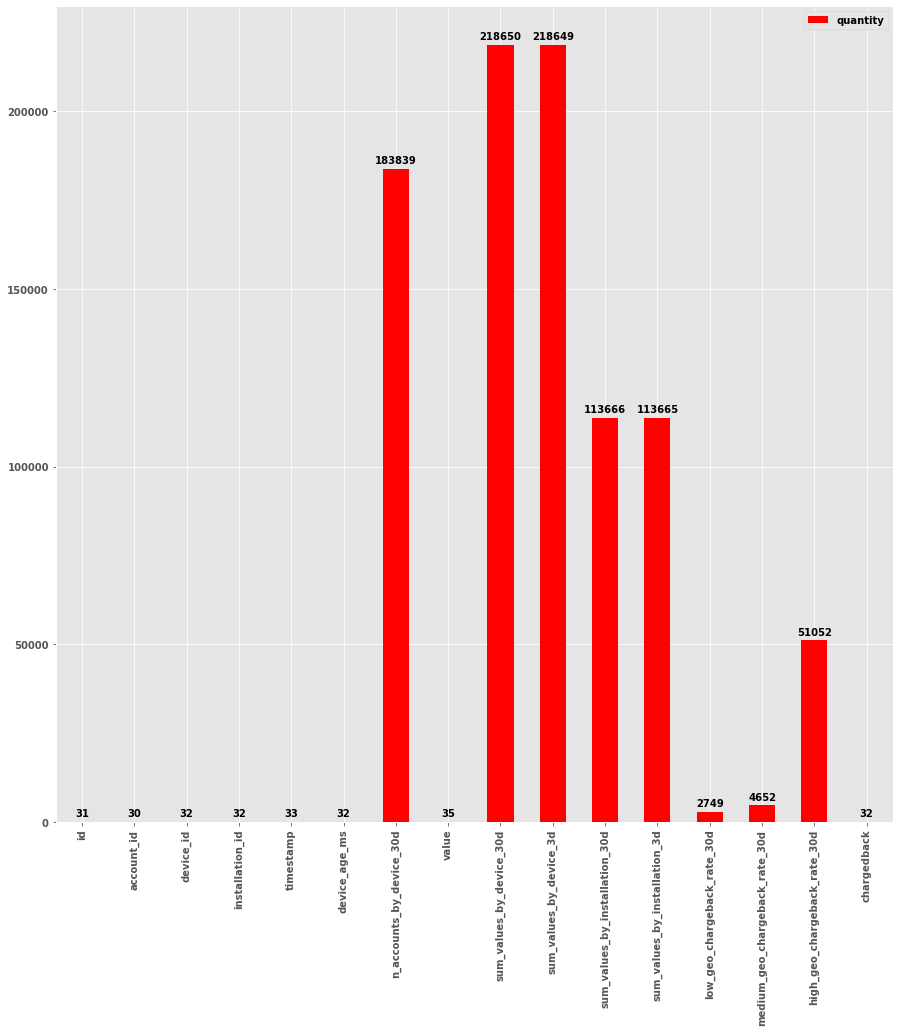

In [688]:
ax = summary.plot(kind='bar', figsize=(15,15), color='red')
labels = list(summary.quantity)
rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 1000, label, ha="center", va="bottom" 
    )

In [689]:
describe

,id,account_id,device_id,installation_id,timestamp,device_age_ms,n_accounts_by_device_30d,value,sum_values_by_device_30d,sum_values_by_device_3d,sum_values_by_installation_30d,sum_values_by_installation_3d,low_geo_chargeback_rate_30d,medium_geo_chargeback_rate_30d,high_geo_chargeback_rate_30d,chargedback
count,648142,648143,648141,648141,648140.00,648141.00,464334.00,648138.00,429523.00,429524.00,534507.00,534508.00,645424.00,643521.00,597121.00,648141.00
unique,648142,115411,83991,119205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,103262188752,oEbOHeqrR6D/8tWf,GgWDCBqCa09125xz,ZUD0VX/c5djWmcEj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,572,148464,616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1626069204282.48,8181145189.95,1.20,103.87,1018.76,127.47,966.94,119.54,0.01,0.01,0.01,0.01
std,NaN,NaN,NaN,NaN,3494489854.45,5332992496.58,2.28,557.83,2778.54,1091.08,2409.13,841.66,0.03,0.06,0.08,0.48
min,NaN,NaN,NaN,NaN,1619816480059.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,NaN,NaN,NaN,NaN,1623109198462.00,3901882446.00,1.00,52.43,154.27,0.00,164.68,0.00,0.00,0.00,0.00,0.00
50%,NaN,NaN,NaN,NaN,1626176416145.00,8061329152.00,1.00,73.78,499.87,0.00,497.99,0.00,0.00,0.00,0.00,0.00
75%,NaN,NaN,NaN,NaN,1629025296376.00,12008901205.00,1.00,122.36,1132.09,123.36,1100.60,125.09,0.01,0.00,0.00,0.00


Definição de todas as funções utilizadas no projeto:

In [690]:
def notNaFilter(frame, column):
    for label in column:
        frame = frame[frame[label].notna()]
    return frame

def fillNaFilter(frame, column):
    for label in column:
        frame[label] = frame[label].fillna(0)
    return frame

def numericColumns(columns):
    for labels in columns:
        paymentTable[labels] = pd.to_numeric(paymentTable[labels], errors = 'coerce')
    return paymentTable

def sumColumns(columns, frame, axis):
    for labels in columns:
        aux = paymentTable.groupby([axis])[labels].sum()
        aux = aux.reset_index()
        frame['sum'+labels] = aux[labels]
    return frame
def sumValueCharged(columns, frame):
    for labels in columns:
        paymentTable['chargedback'] = paymentTable['chargedback'].astype(str)
        aux_charged = paymentTable.where(paymentTable['chargedback'] == '0.0').groupby(['account_id'])[labels].sum().reset_index(name = 'unchargedback_value')
        aux_uncharged = paymentTable.where(paymentTable['chargedback'] == '1.0').groupby(['account_id'])[labels].sum().reset_index(name = 'chargedback_value')
        frame = frame.join(aux_charged.set_index('account_id')[['unchargedback_value']], on='account_id')
        frame = frame.join(aux_uncharged.set_index('account_id')[['chargedback_value']], on='account_id')
    return frame
def plotBarChart(df,labels,title,color):
    fig, ax = plt.subplots()
    df.plot(kind='bar', figsize=(20,20), title=title, ax=ax, color=color)
    ax.legend(labels)
    return
def plotBarChartList(top,title,colors):
    labels, ys = zip(*top)
    xs = np.arange(len(labels)) 
    width = 0.8

    fig = plt.figure(figsize=(13, 13))                                                               
    ax = fig.gca()  #get current axes
    ax.bar(xs, ys, width, align='center',color=colors)
    ax.set_xticks(xs)
    ax.set_xticklabels(labels)
    ax.set_yticks(ys)
    ax.set_title(title, y=0.9, pad=-14)

    rects = ax.patches
    for rect, label in zip(rects, ys):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height, "{:0.2f}".format(label), ha="center", va="bottom" 
        )
    return
def plotPieChart(title,df,labels,colors):
    fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
    fig.set_facecolor('whitesmoke')
    patches, texts, percentage = ax.pie(df,wedgeprops=dict(width=1), colors=colors, startangle=90,autopct='%1.2f%%', radius=4)
    plt.legend(patches, labels, loc="center left", bbox_to_anchor=(2.3, 1, 1, 1), prop={'size': 15})
    ax.set_title(title, y=0.9, pad=-14)
    plt.show()
    return

Tratamento da tabela referente aos dados nulos, variando de acordo com o seu tipo.

Ex: account_id será disconsiderado os valores nulos e sum_values_by_device_30d os valores nulos serão igualados a 0. 

In [691]:
notNaColumns = ['account_id', 'device_id', 'id', 'chargedback', 'value']
fillNaColumns = ['n_accounts_by_device_30d', 'sum_values_by_device_30d', 'sum_values_by_device_3d', 'sum_values_by_installation_30d', 'sum_values_by_installation_3d','low_geo_chargeback_rate_30d','medium_geo_chargeback_rate_30d','high_geo_chargeback_rate_30d']
paymentTable.columns = [x.lower() for x in paymentTable.columns]
paymentTable = notNaFilter(paymentTable, notNaColumns)
paymentTable = fillNaFilter(paymentTable, fillNaColumns)
paymentTable['datetime'] = pd.to_datetime(paymentTable['timestamp'], unit='ms')
paymentTable['device_age'] = pd.to_timedelta(paymentTable['device_age_ms'], unit='ms')
paymentTable
pd.set_option('display.max_columns', None)


In [692]:
describe = paymentTable.describe(include='all', datetime_is_numeric=True)
summary = paymentTable.isna().sum().to_frame('quantity')
summary

,quantity
id,0
account_id,0
device_id,0
installation_id,2
timestamp,3
device_age_ms,2
n_accounts_by_device_30d,0
value,0
sum_values_by_device_30d,0
sum_values_by_device_3d,0


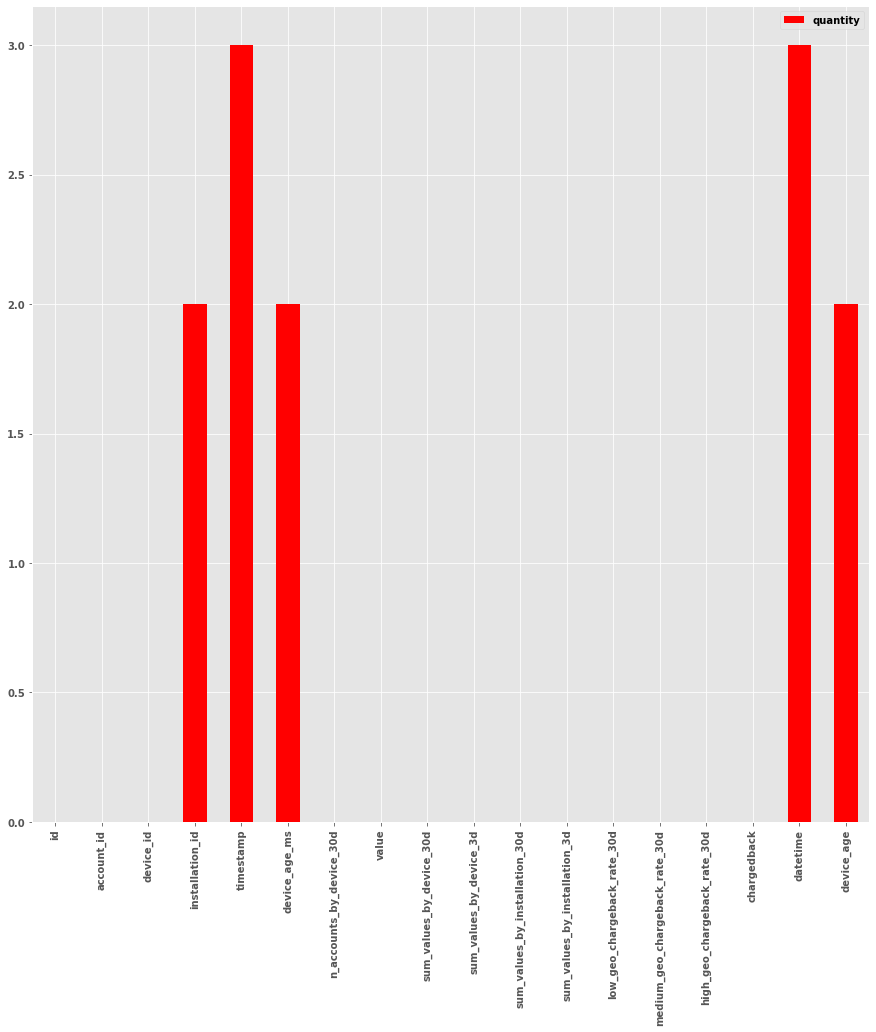

In [693]:
ax = summary.plot(kind='bar', figsize=(15,15), color='red')

In [694]:
describe

,id,account_id,device_id,installation_id,timestamp,device_age_ms,n_accounts_by_device_30d,value,sum_values_by_device_30d,sum_values_by_device_3d,sum_values_by_installation_30d,sum_values_by_installation_3d,low_geo_chargeback_rate_30d,medium_geo_chargeback_rate_30d,high_geo_chargeback_rate_30d,chargedback,datetime,device_age
count,648133,648133,648133,648131,648130.00,648131.00,648133.00,648133.00,648133.00,648133.00,648133.00,648133.00,648133.00,648133.00,648133.00,648133.00,648130,648131
unique,648133,115411,83991,119205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,103262188752,oEbOHeqrR6D/8tWf,GgWDCBqCa09125xz,ZUD0VX/c5djWmcEj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,572,148464,616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1626069203198.10,8181110446.65,0.86,103.87,675.13,84.47,797.41,98.58,0.01,0.01,0.01,0.01,2021-07-12 05:53:23.198097920,94 days 16:31:50.446654784
min,NaN,NaN,NaN,NaN,1619816480059.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2021-04-30 21:01:20.059000064,0 days 00:00:00
25%,NaN,NaN,NaN,NaN,1623109193424.00,3901862775.00,0.00,52.43,0.00,0.00,35.62,0.00,0.00,0.00,0.00,0.00,2021-06-07 23:39:53.424000,45 days 03:51:02.775000
50%,NaN,NaN,NaN,NaN,1626176416145.00,8061305495.00,1.00,73.78,150.15,0.00,333.63,0.00,0.00,0.00,0.00,0.00,2021-07-13 11:40:16.144999936,93 days 07:15:05.495000
75%,NaN,NaN,NaN,NaN,1629025287845.50,12008885781.00,1.00,122.36,754.19,60.11,929.64,94.62,0.01,0.00,0.00,0.00,2021-08-15 11:01:27.845499904,138 days 23:48:05.781000
max,NaN,NaN,NaN,NaN,1632192643721.00,20911180372.00,104.00,125007.58,427599.17,427280.78,320774.25,320455.86,1.00,1.00,1.00,95.00,2021-09-21 02:50:43.720999936,242 days 00:39:40.372000


## Análise do projeto

A partir de agora teremos a análise dos dados do projeto, gerando insights baseado nas colunas e linhas existentes e, caso necessário, criaremos novas colunas para podermos visualizar outros tipos de análise que sejam ricas para o cliente.

# Análise de contas por dispositivo

Este tratamento retornará a quantidade de dispositivos que as contas acessaram presente na base de dados.

In [695]:
accountDevices = paymentTable.groupby('account_id')['device_id'].nunique().to_frame('device_count').reset_index()
listValueDevice =  accountDevices['device_count'].value_counts()
listValueDevice


1     109232
2       5560
3        496
4         88
5         19
6          7
12         2
21         2
9          2
13         1
8          1
7          1
Name: device_count, dtype: int64

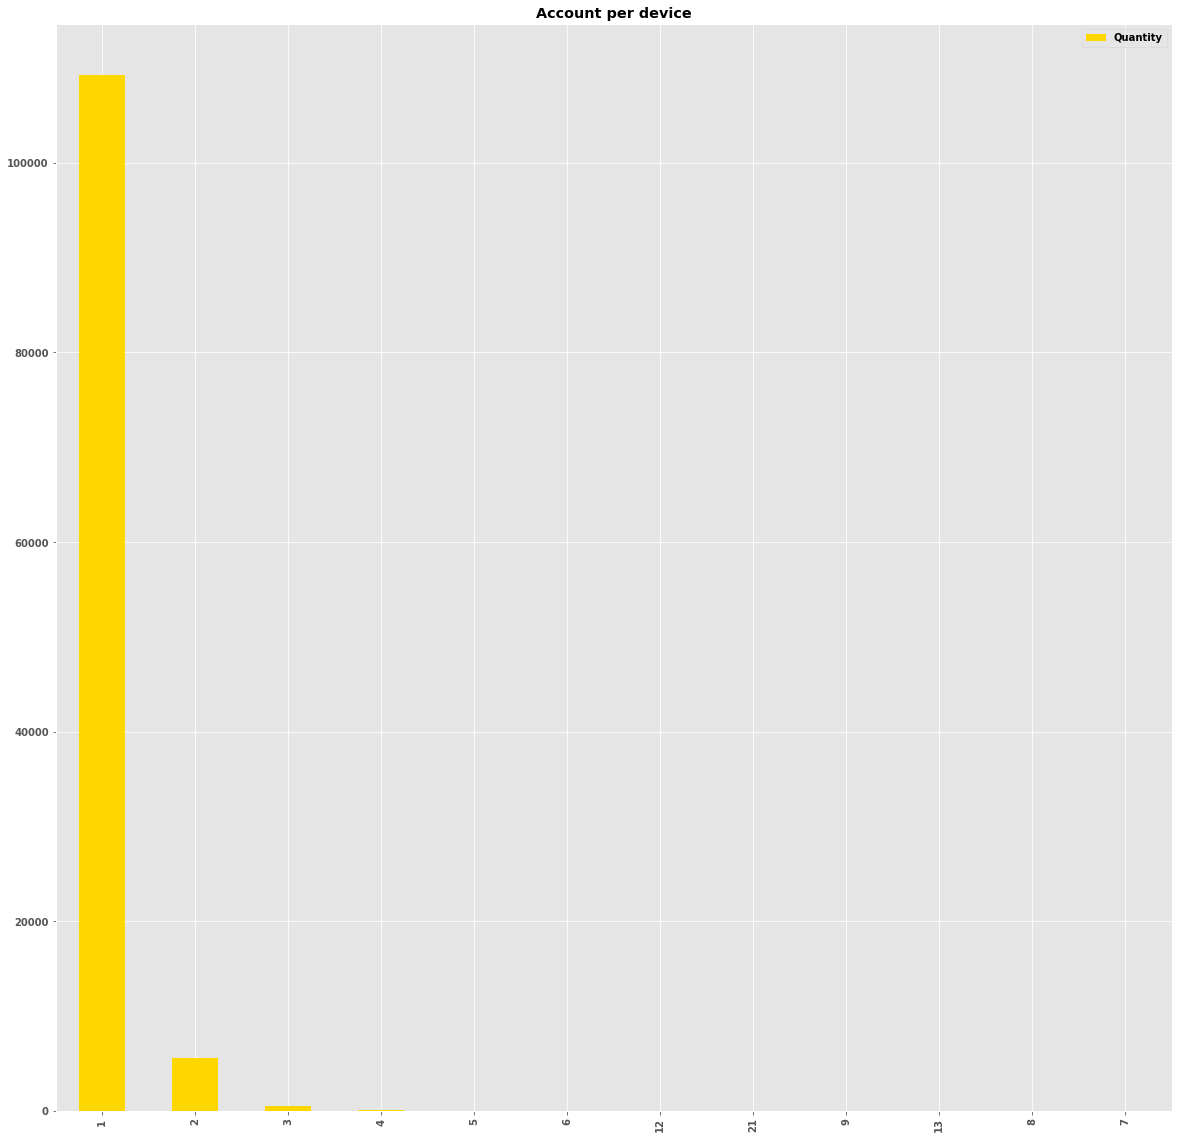

In [696]:
labels=['Quantity']
color = ['gold']
plotBarChart(listValueDevice,labels,'Account per device',color)

## Contas com reembolso

Aqui teremos uma sequência de tratamentos em busca de gráficos que facilitem a visualização e a correlação das contas que possuem algum tipo de reembolso.

In [697]:
paymentTable['chargedback'] = pd.to_numeric(paymentTable['chargedback'], errors='coerce')
paymentTable  = paymentTable.loc[((paymentTable['chargedback'] <=1))]
paymentTable['chargedback'] = paymentTable['chargedback'].astype(str)

In [698]:
tableAccountIDChargedBackCount = paymentTable.groupby('account_id')['chargedback'].value_counts().to_frame('counts')
tableAccountIDChargedBackCount = tableAccountIDChargedBackCount.reset_index().drop('counts',1)
listValueChargedBack =  tableAccountIDChargedBackCount['chargedback'].value_counts()
listValueChargedBack

C:\Users\victo\AppData\Local\Temp/ipykernel_11732/809610350.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  tableAccountIDChargedBackCount = tableAccountIDChargedBackCount.reset_index().drop('counts',1)


0.0    114948
1.0      1612
Name: chargedback, dtype: int64

## Total das transações que possuem ou não reembolso.

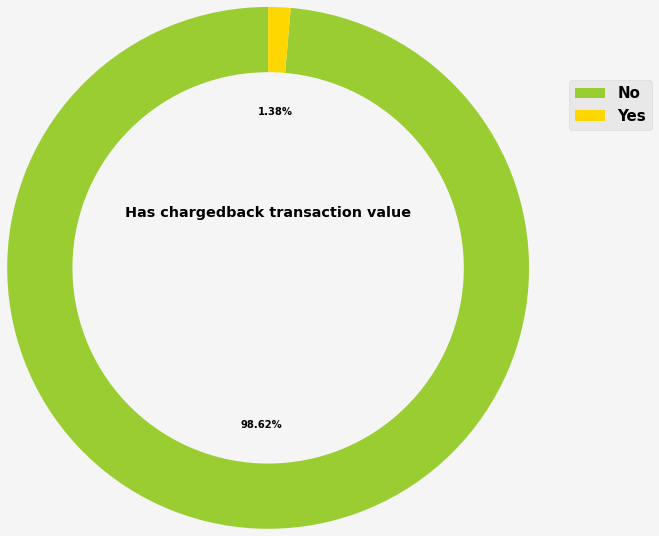

In [699]:
labels=['No', 'Yes']
colors = ['yellowgreen', 'gold']
plotPieChart('Has chargedback transaction value', listValueChargedBack, labels,colors) 

Para facilitar certas análises, é necessário criar um dataframe menor e tratar suas particularidades.

In [700]:
tableAccountID = paymentTable.groupby('account_id')['account_id'].count().to_frame('quantity').reset_index()
tableAccountID['quantity'] = pd.to_numeric(tableAccountID['quantity'], errors='coerce')
tableAccountID.dropna(subset =['quantity'], inplace=True)

In [701]:
sumUpColumnsLabels = ['value']

Tabela agrupada por account_id e todos os valores das suas transações, com a visão de valores reembolsados ou não.

In [702]:

paymentTable = numericColumns(sumUpColumnsLabels)
tableAccountID = sumColumns(sumUpColumnsLabels, tableAccountID, 'account_id')
tableAccountID.dropna(subset =['sumvalue'], inplace=True)
tableAccountID = sumValueCharged(sumUpColumnsLabels, tableAccountID)
tableAccountID.dropna(subset =['quantity'], inplace=True)
tableAccountID.set_index('account_id', inplace=True)
tableAccountID['chargedback_value'] = tableAccountID["chargedback_value"].fillna(0)

tableAccountID

,quantity,sumvalue,unchargedback_value,chargedback_value
account_id,,,,
+++F5JdXBfV96KZ6,1,98.00,98.00,0.00
++1OYxeEe7SiKZkJ,12,977.61,977.61,0.00
++2dMAuOnDr1rG4l,1,263.50,263.50,0.00
++3eJlJ6p/5LhXg5,6,120.62,120.62,0.00
++3rynzBezPY5ZGl,2,40.84,40.84,0.00
...,...,...,...,...
zzsPFPlFkGi92dY0,3,154.20,154.20,0.00
zzvqBrxK7GQsXiHF,2,311.52,311.52,0.00
zzz6NM92xuPtN1pt,2,94.35,94.35,0.00


Calculo da frequência da aparição das contas.


In [703]:
dfAccountFrequencyTotal = tableAccountID.copy()
dfAccountFrequencyTotal['quantity'] = dfAccountFrequencyTotal['quantity'].where(dfAccountFrequencyTotal['quantity'] > 200)
dfAccountFrequencyTotal.dropna(subset =['quantity'], inplace=True)


## Contas que aparecem mais de 200 vezes na lista de transações

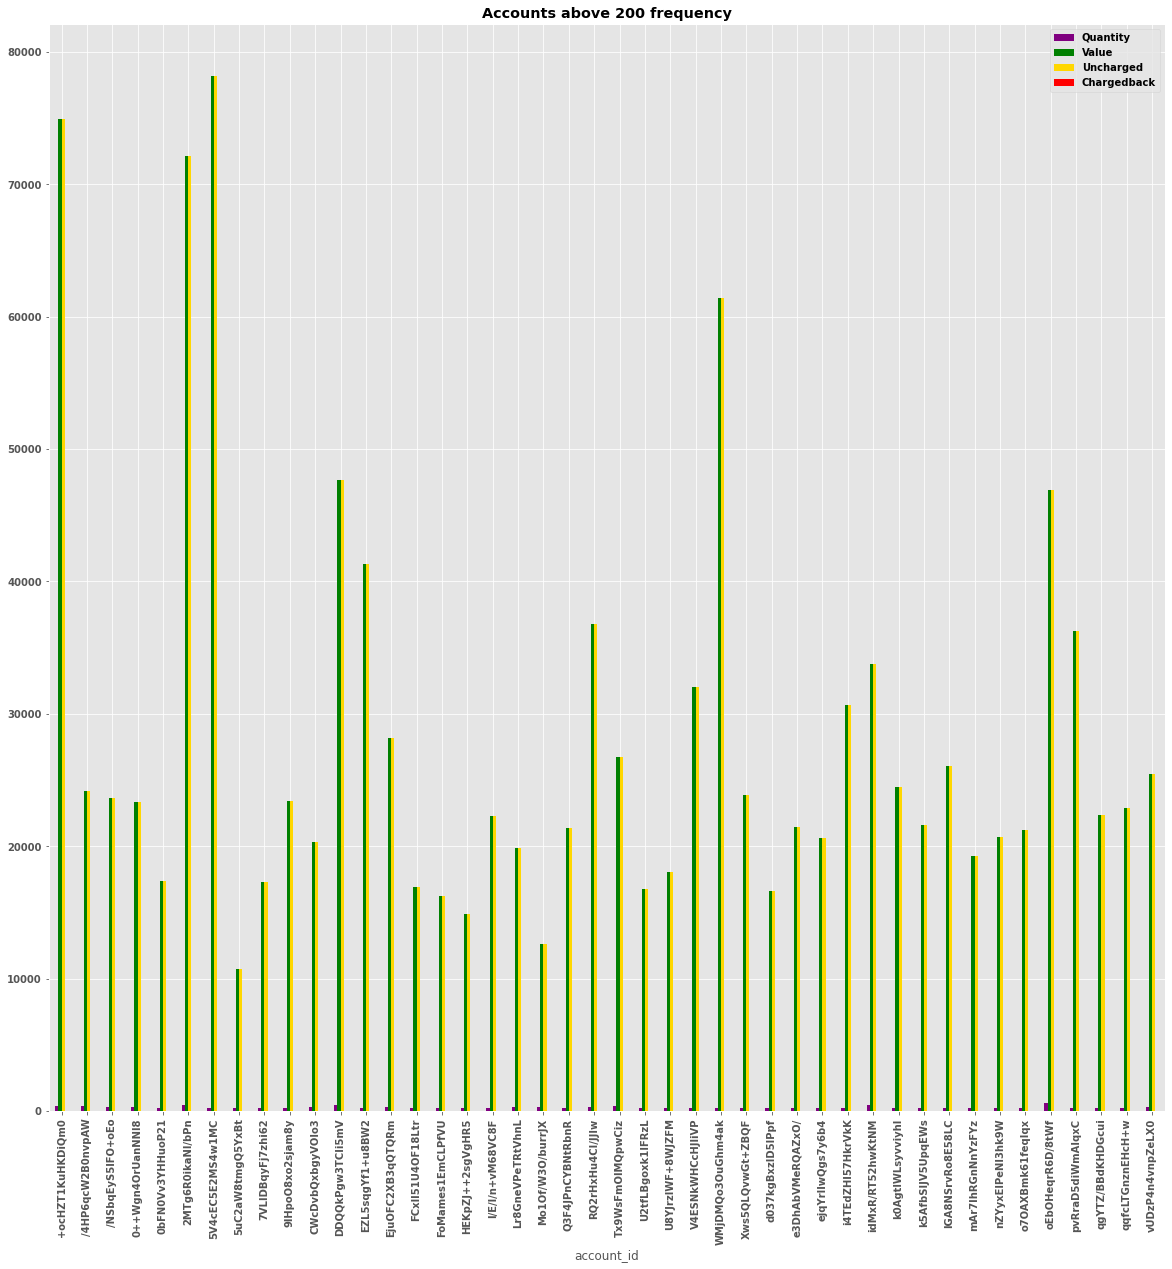

In [704]:
labels=['Quantity', 'Value', 'Uncharged', 'Chargedback']
colors = ['purple', 'green','gold','red']
plotBarChart(dfAccountFrequencyTotal,labels,'Accounts above 200 frequency', colors)

Filtro onde separa todas as contas que possuem algum reembolso

In [705]:
tableAccountChargedBack = tableAccountID

tableAccountChargedBack = tableAccountChargedBack[tableAccountChargedBack.chargedback_value > 0]

tableAccountChargedBack

,quantity,sumvalue,unchargedback_value,chargedback_value
account_id,,,,
+/2pil5MpG/EVyxU,2,563.72,294.93,268.79
+1mqFJcInfAwOeY7,7,552.13,147.45,404.68
+3Kv4Emt90G/FLgZ,3,677.19,482.35,194.84
+3n1MySMgi8hEofW,6,542.28,360.16,182.11
+4dTYp1tFZE4y5nm,4,488.34,336.15,152.19
...,...,...,...,...
zsYfbrS66tP7T0/J,1,81.01,NaN,81.01
zsnbZ4HNGLVE1Y/U,5,277.10,235.13,41.96
zv+/3whZbmawSO69,5,1118.01,715.18,402.82


Como o DataFrame possui um número elevado de linhas, foi necessário criar alguns intervalos entre as quantidades de contas para facilitar a visualização gráfica.

## Contas que possuem reembolso e suas aparições na lista de transações.

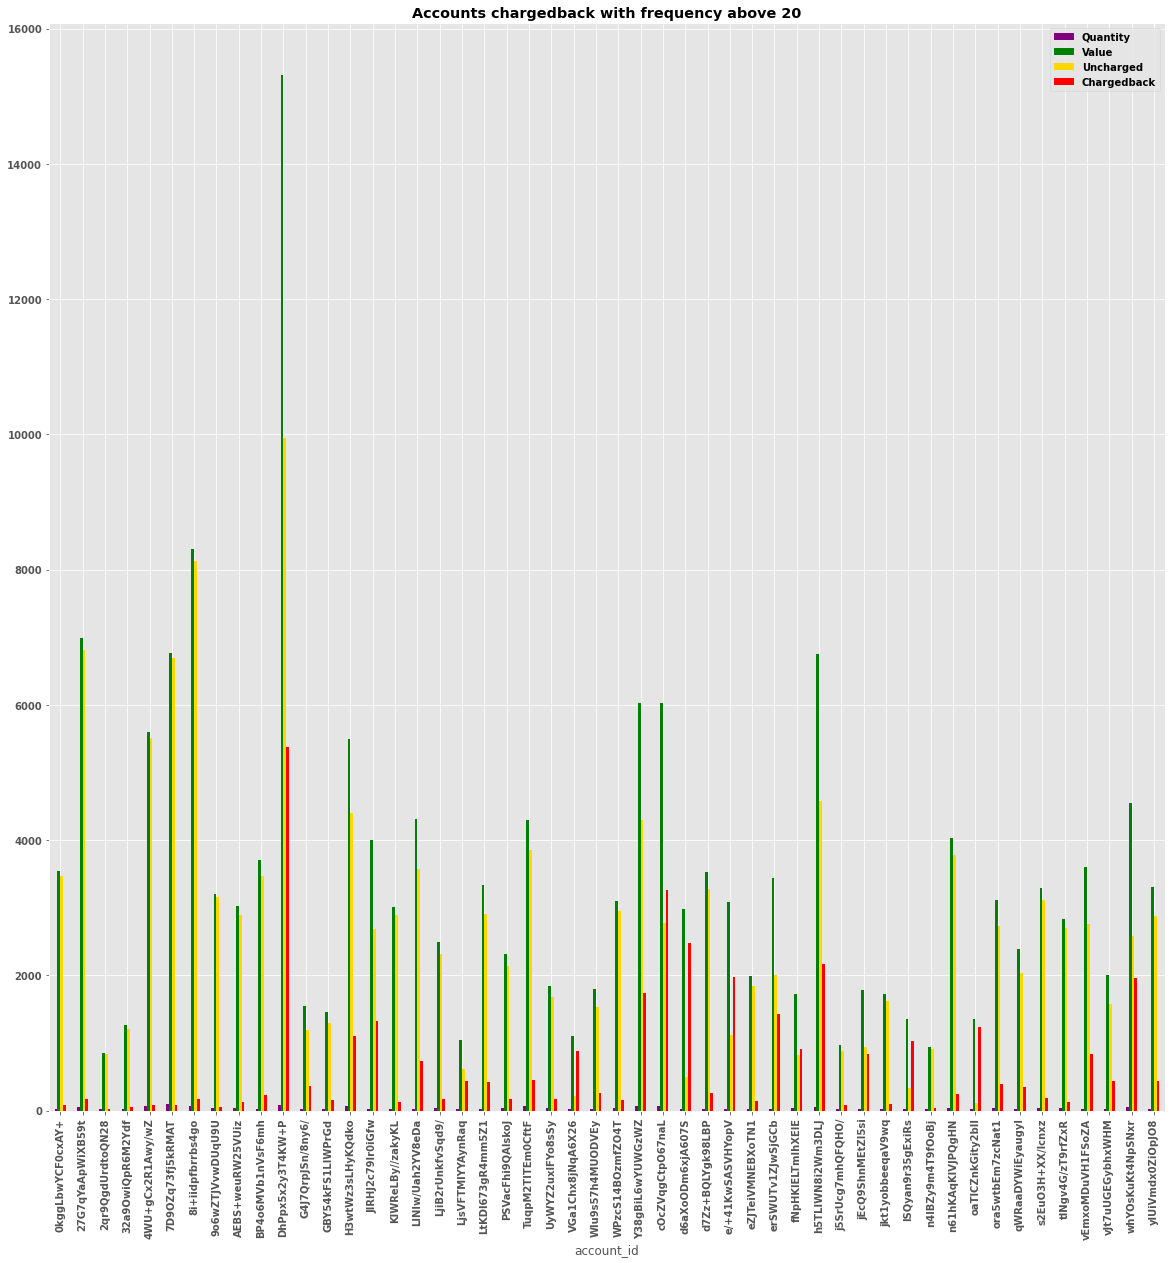

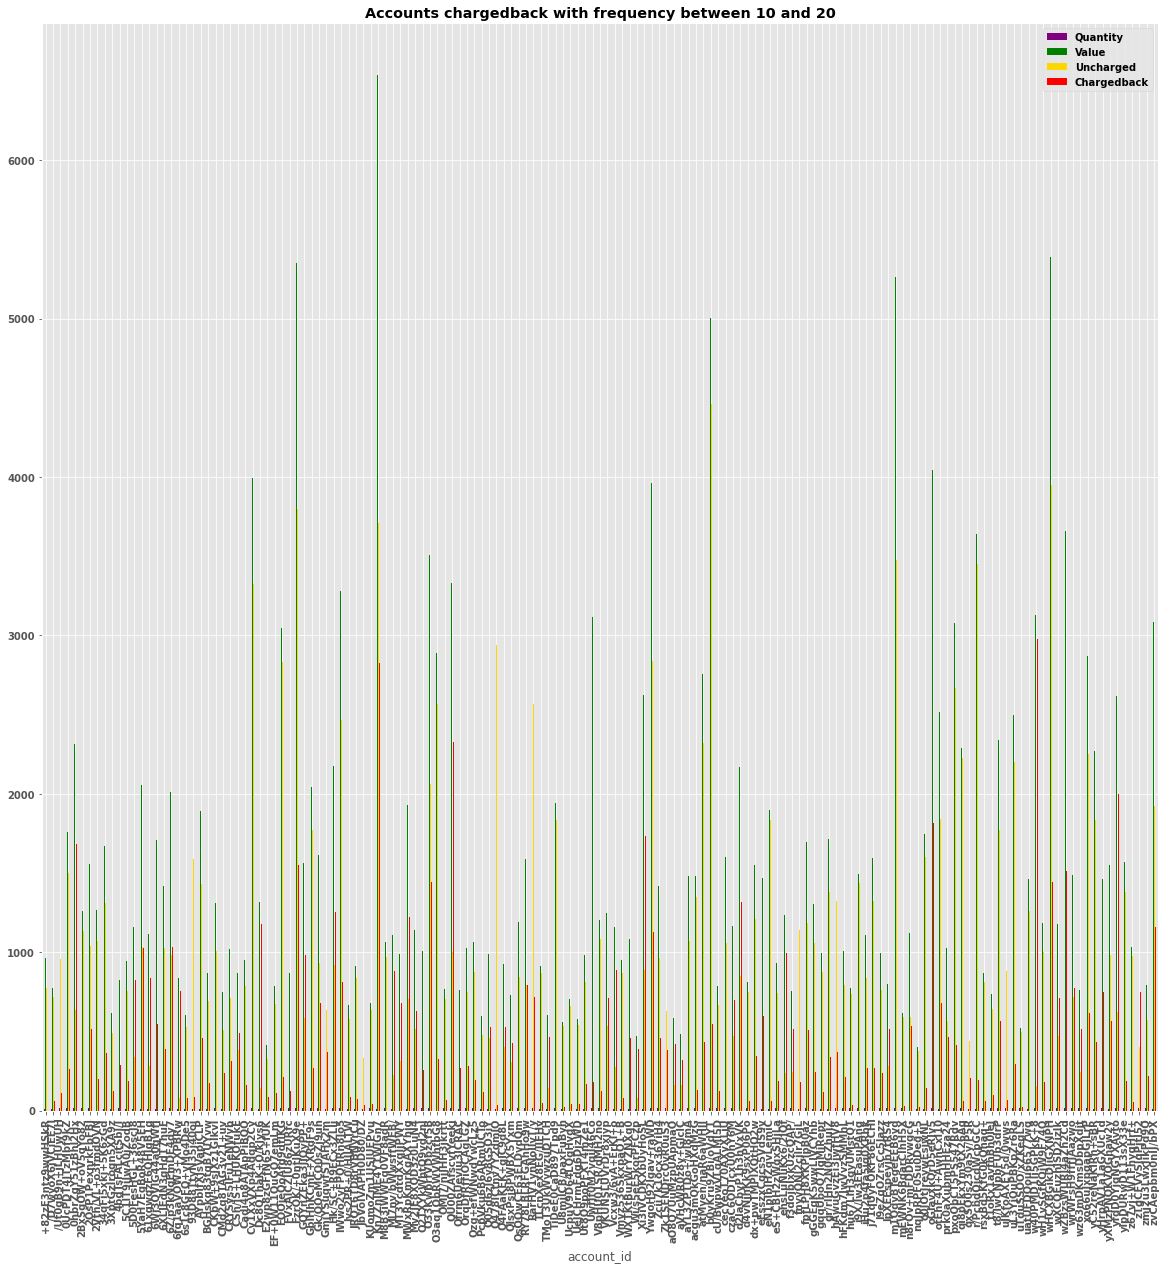

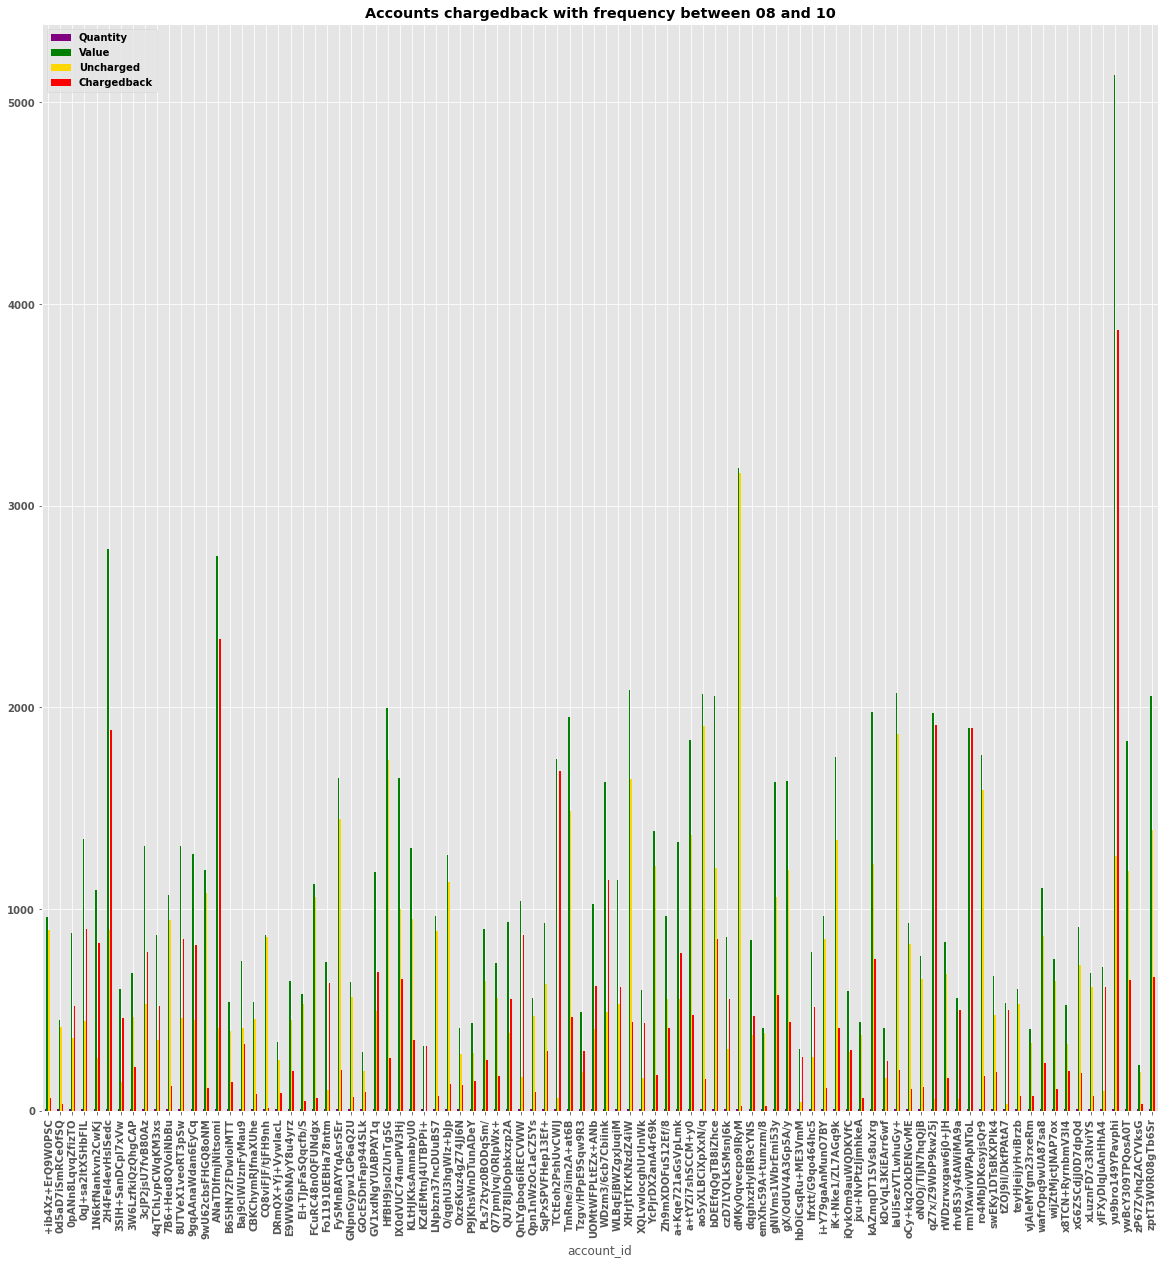

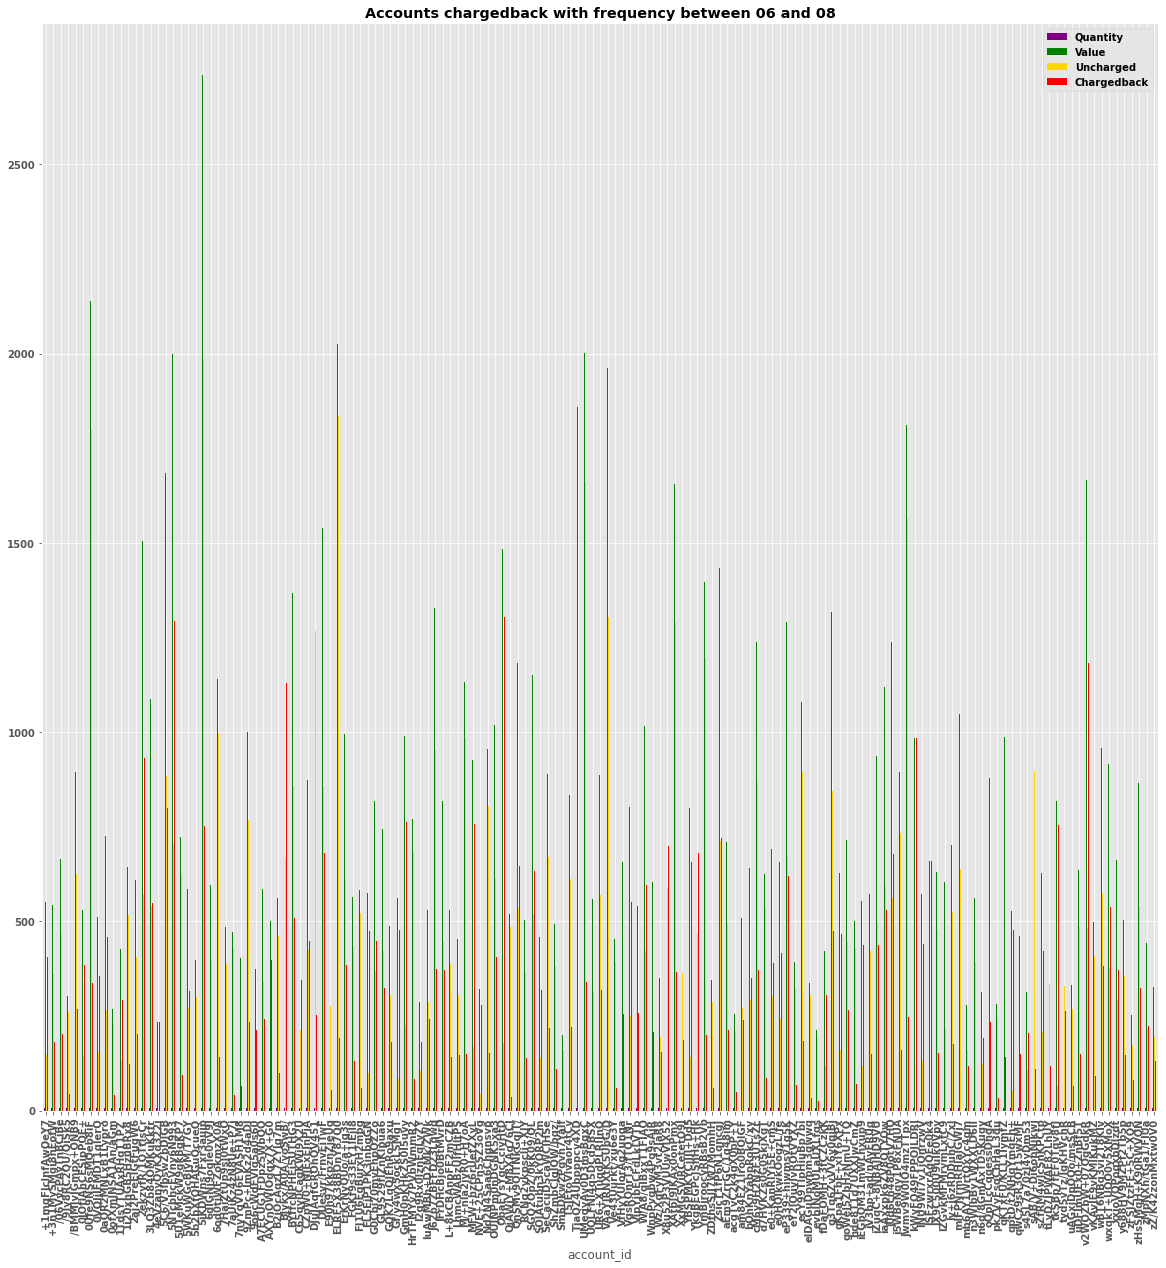

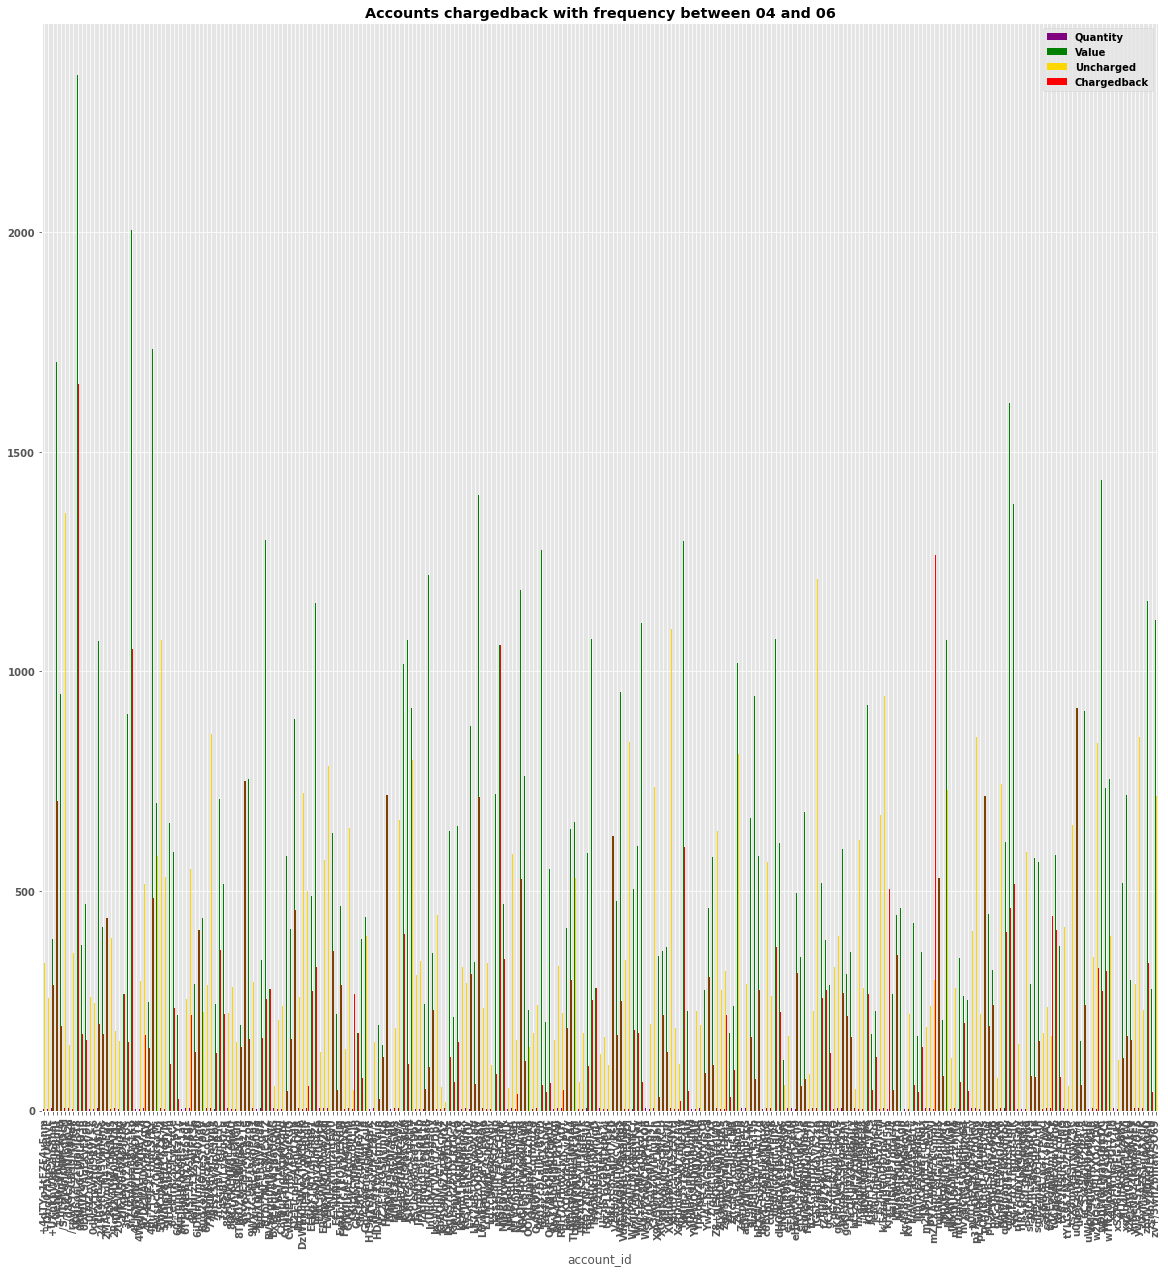

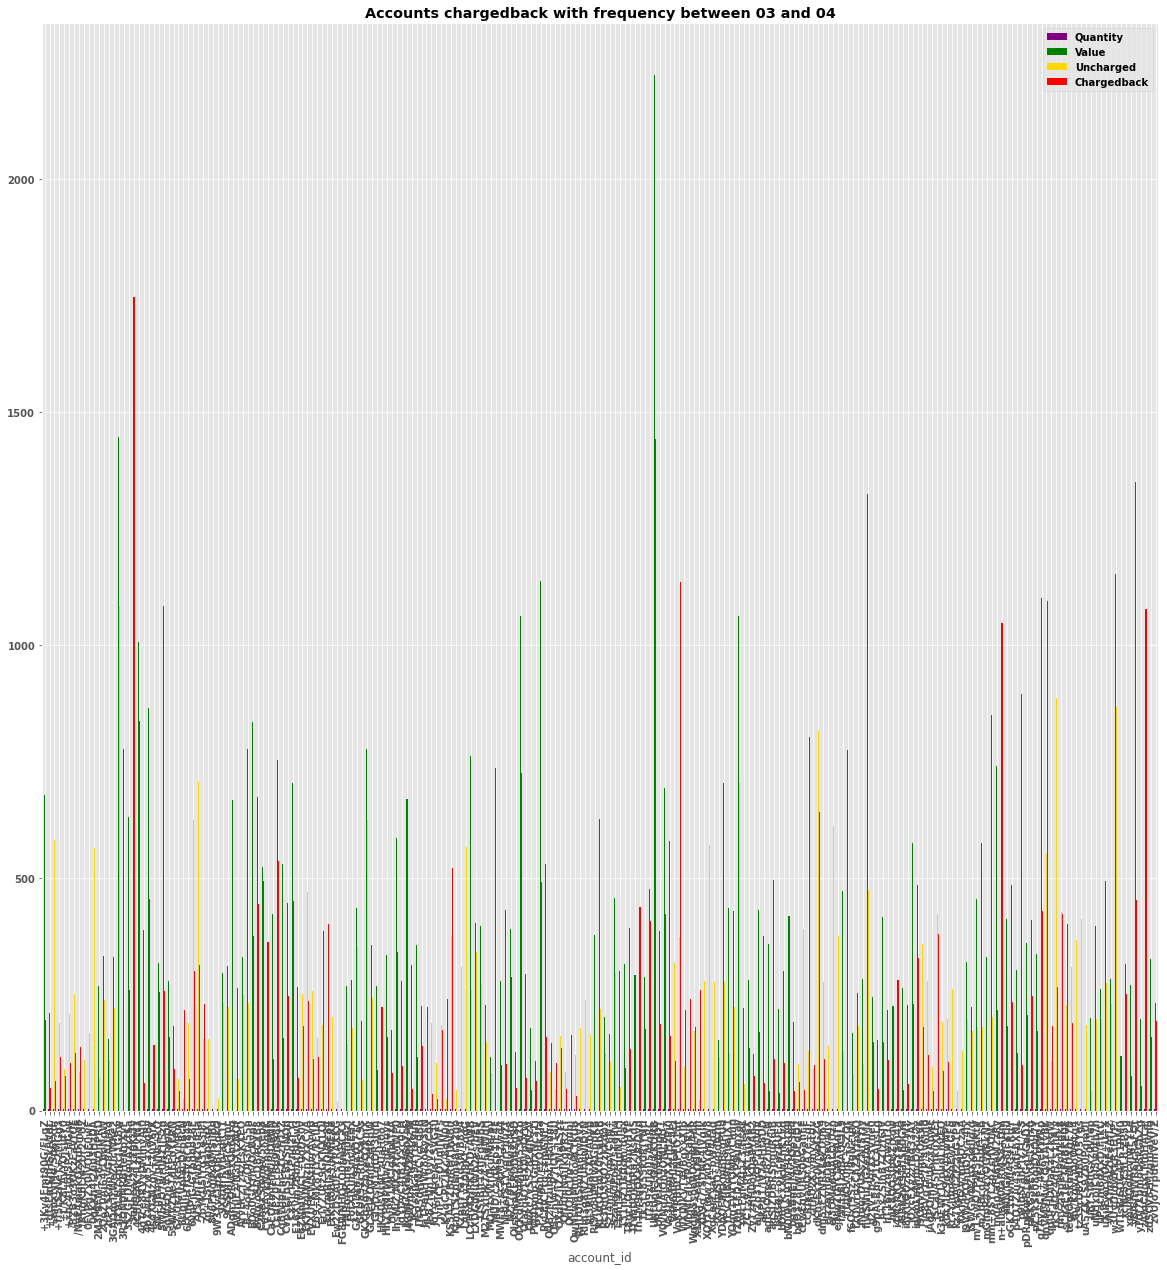

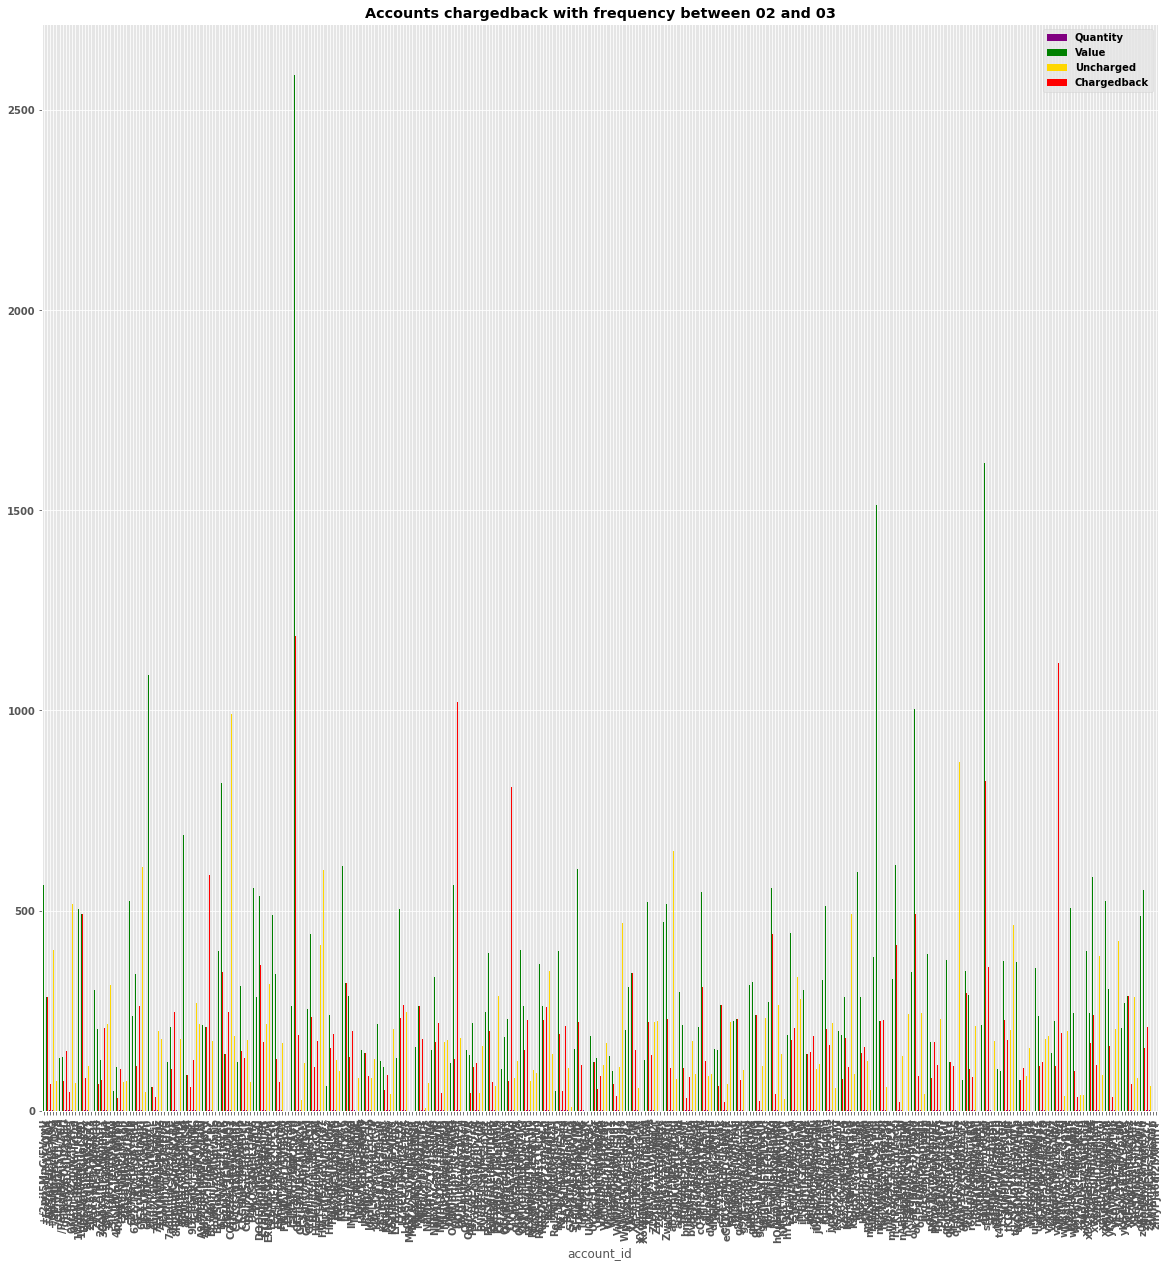

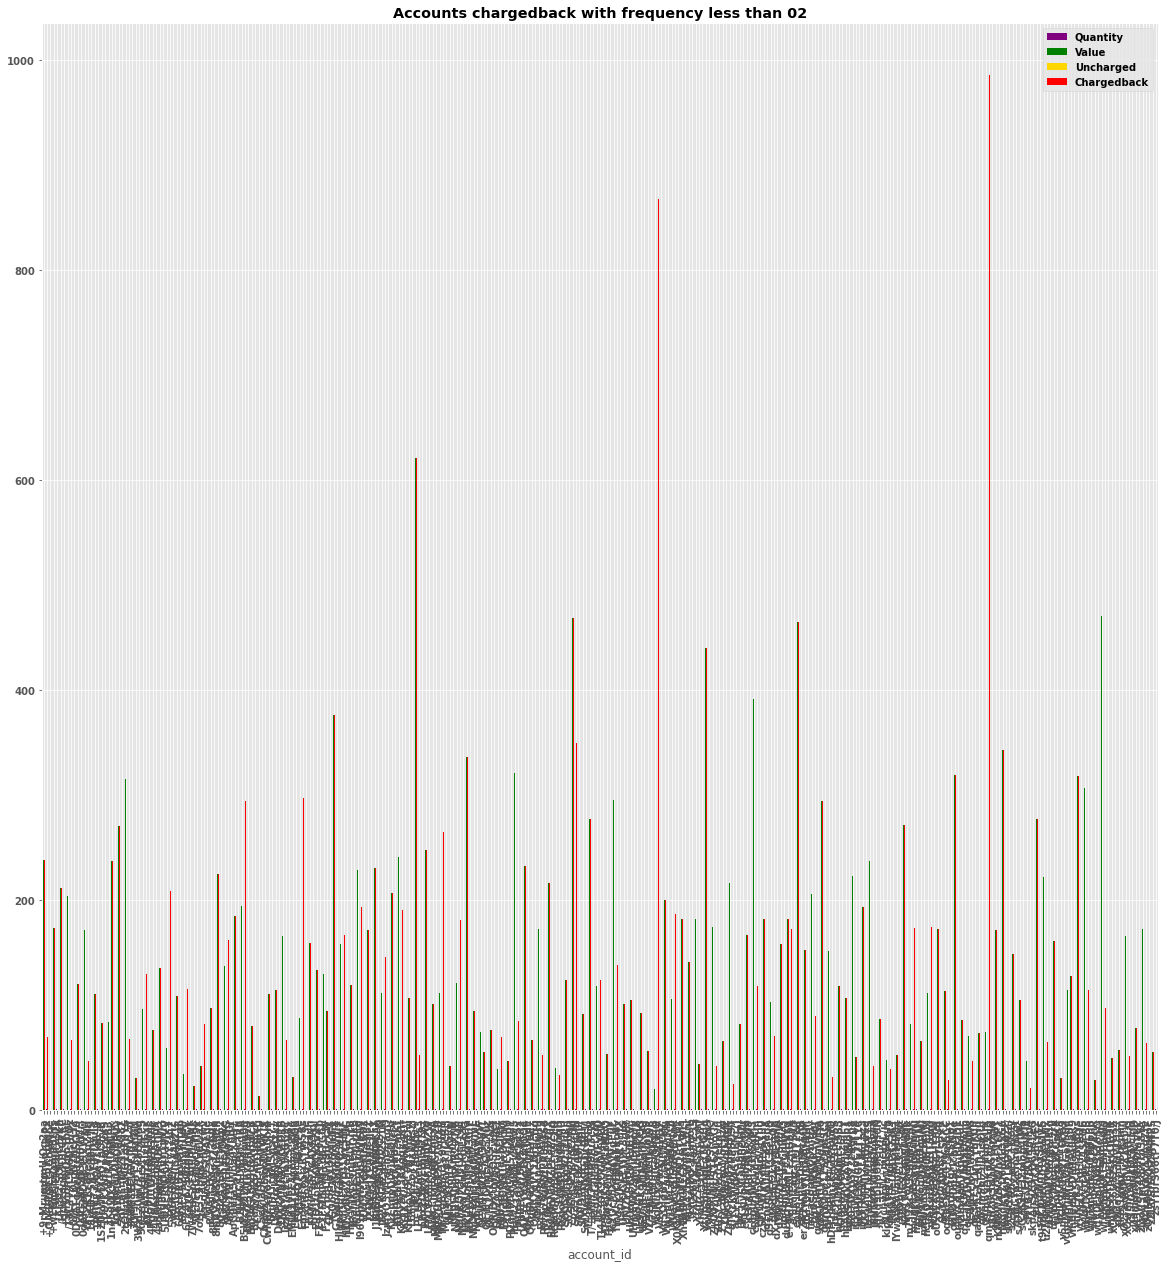

In [706]:
labels=['Quantity', 'Value', 'Uncharged', 'Chargedback']
colors = ['purple', 'green','gold','red']

tableAccountChargedBack20 = tableAccountChargedBack[tableAccountChargedBack.quantity >= 20]
tableAccountChargedBack1020 = tableAccountChargedBack[((tableAccountChargedBack.quantity >= 10) & (tableAccountChargedBack.quantity < 20))]
tableAccountChargedBack0810 = tableAccountChargedBack[((tableAccountChargedBack.quantity >= 8) & (tableAccountChargedBack.quantity < 10))]
tableAccountChargedBack0608 = tableAccountChargedBack[((tableAccountChargedBack.quantity >= 6) & (tableAccountChargedBack.quantity < 8))]
tableAccountChargedBack0406 = tableAccountChargedBack[((tableAccountChargedBack.quantity >= 4) & (tableAccountChargedBack.quantity < 6))]
tableAccountChargedBack0304 = tableAccountChargedBack[((tableAccountChargedBack.quantity >= 3) & (tableAccountChargedBack.quantity < 4))]
tableAccountChargedBack0203 = tableAccountChargedBack[((tableAccountChargedBack.quantity >= 2) & (tableAccountChargedBack.quantity < 3))]
tableAccountChargedBack02 = tableAccountChargedBack[(tableAccountChargedBack.quantity < 2)]

plotBarChart(tableAccountChargedBack20,labels,'Accounts chargedback with frequency above 20',colors)
plotBarChart(tableAccountChargedBack1020,labels,'Accounts chargedback with frequency between 10 and 20',colors)
plotBarChart(tableAccountChargedBack0810,labels,'Accounts chargedback with frequency between 08 and 10',colors)
plotBarChart(tableAccountChargedBack0608,labels,'Accounts chargedback with frequency between 06 and 08',colors)
plotBarChart(tableAccountChargedBack0406,labels,'Accounts chargedback with frequency between 04 and 06',colors)
plotBarChart(tableAccountChargedBack0304,labels,'Accounts chargedback with frequency between 03 and 04',colors)
plotBarChart(tableAccountChargedBack0203,labels,'Accounts chargedback with frequency between 02 and 03',colors)
plotBarChart(tableAccountChargedBack02,labels,'Accounts chargedback with frequency less than 02',colors)

Como feito anteriormente, este calculo segue uma linha parecida referente aos reembolsos, porém tem como objetivo visualizar as contas que fizeram mais reembolsos do que transações regulares.

## Contas que possuem reembolso maior do que o valor gasto na plataforma.

Ex: Duas transações de R$10 e R$25 reais respectivamente, onde a de R$25 foi reembolsa, deixando apenas R$10 na plataforma utilizada.

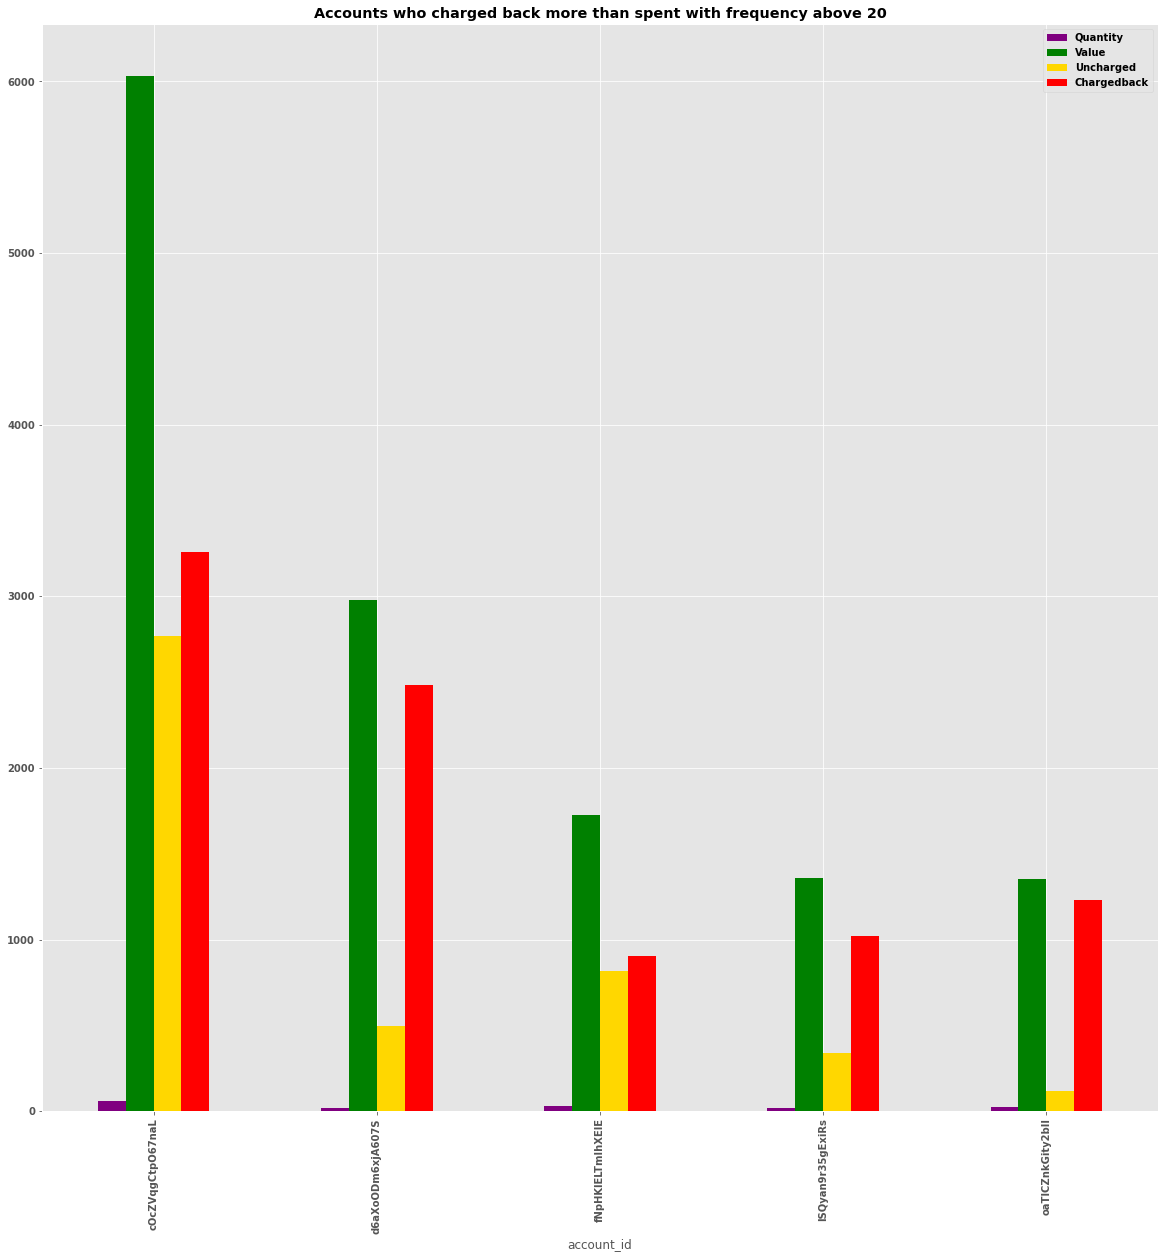

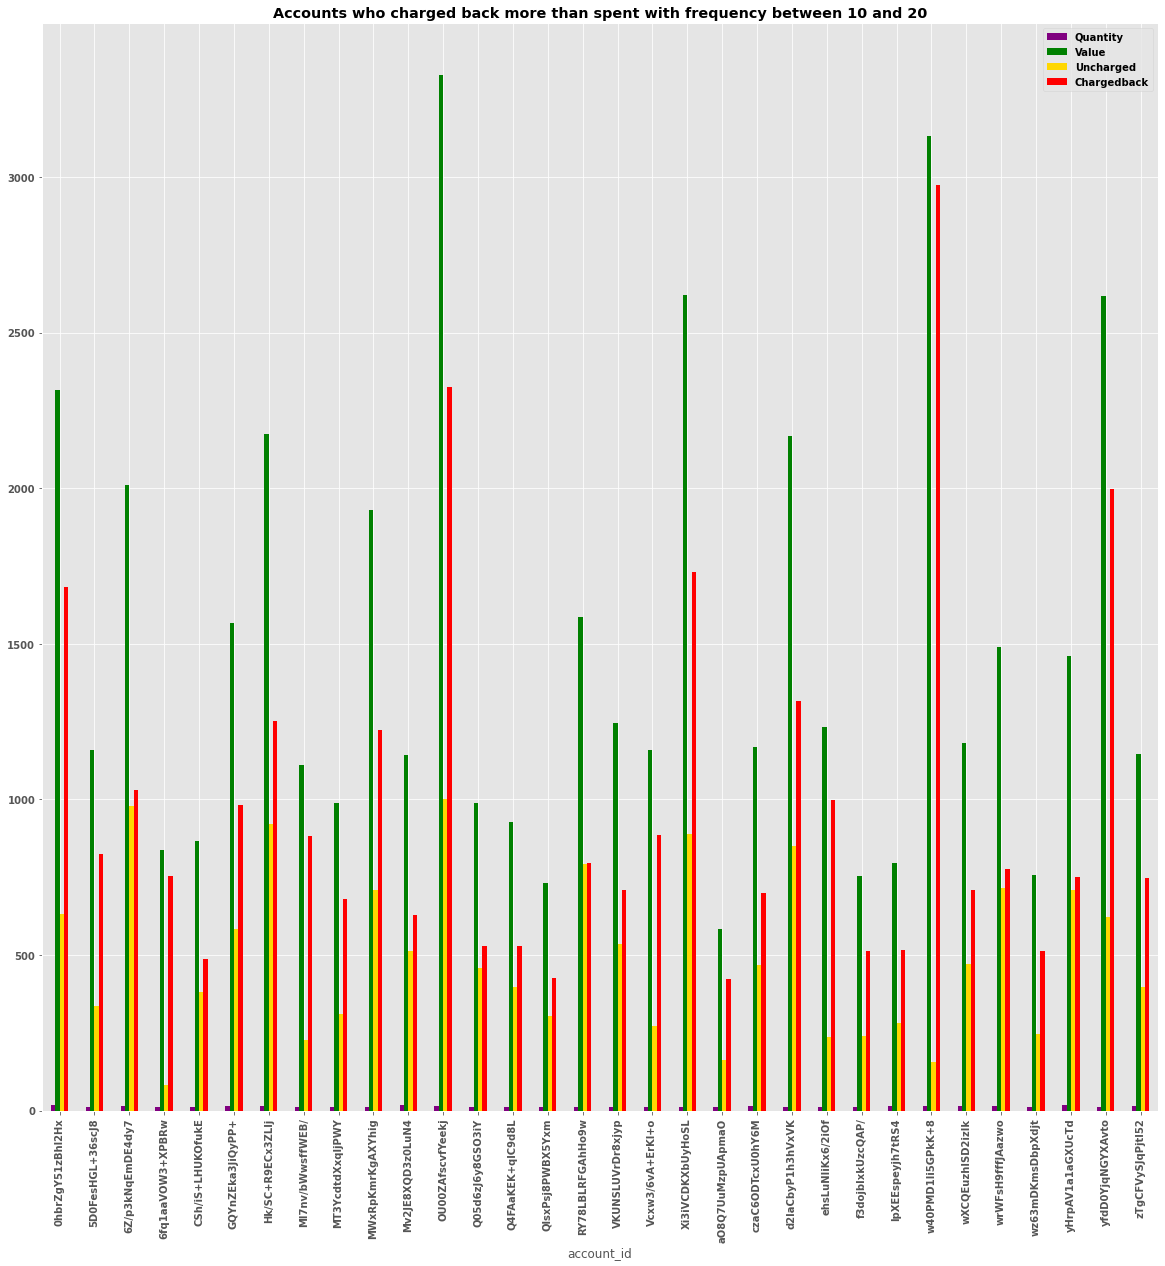

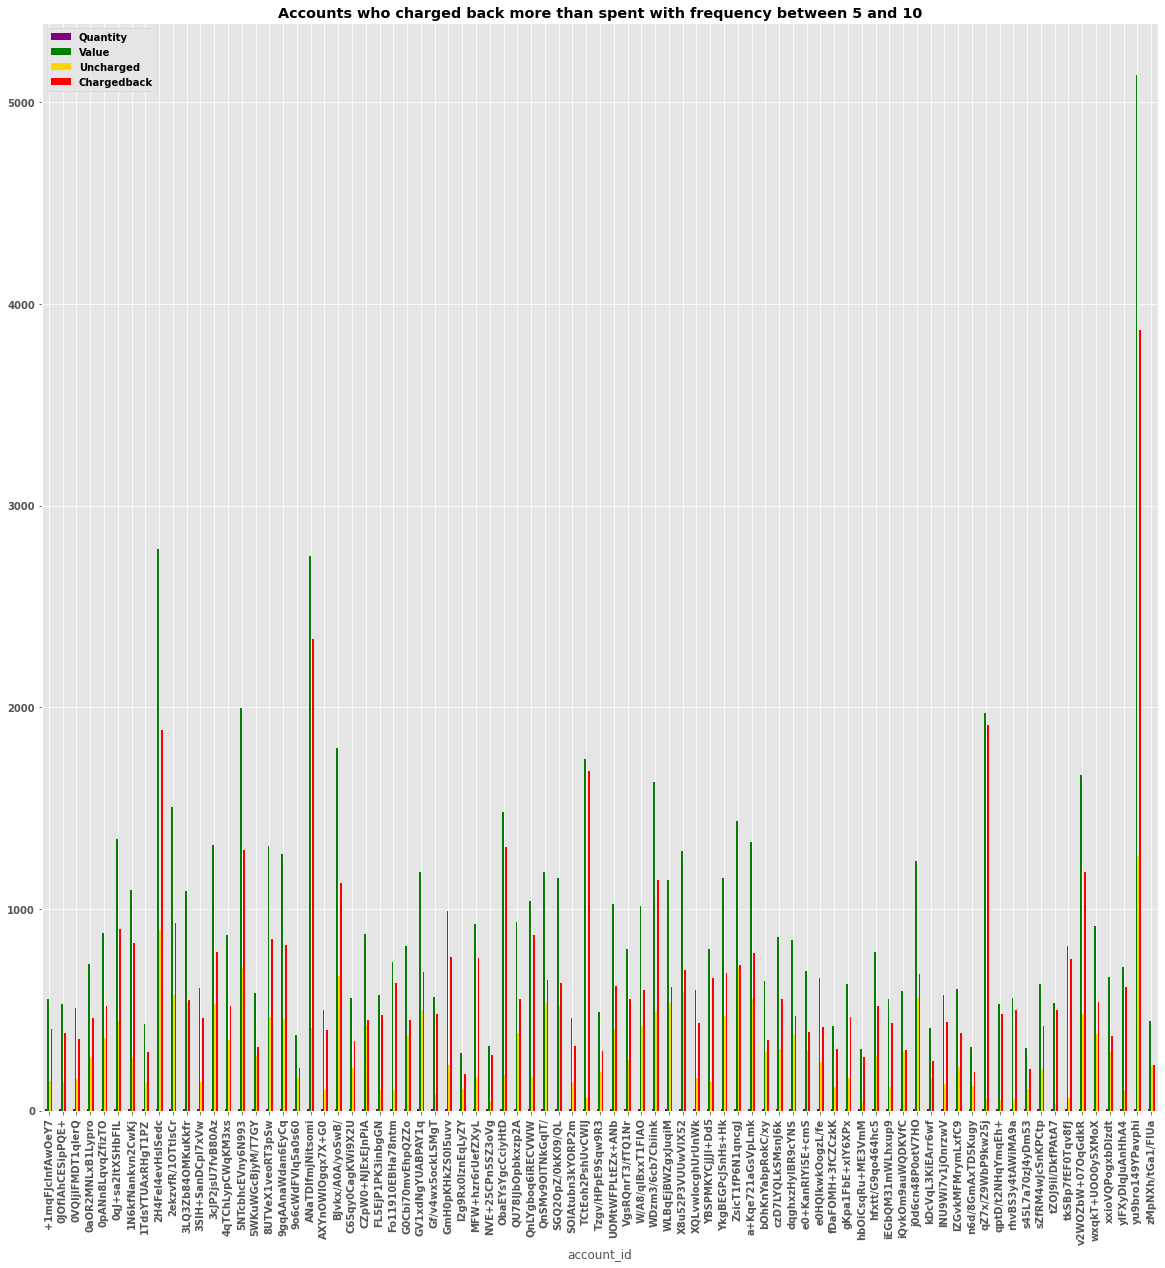

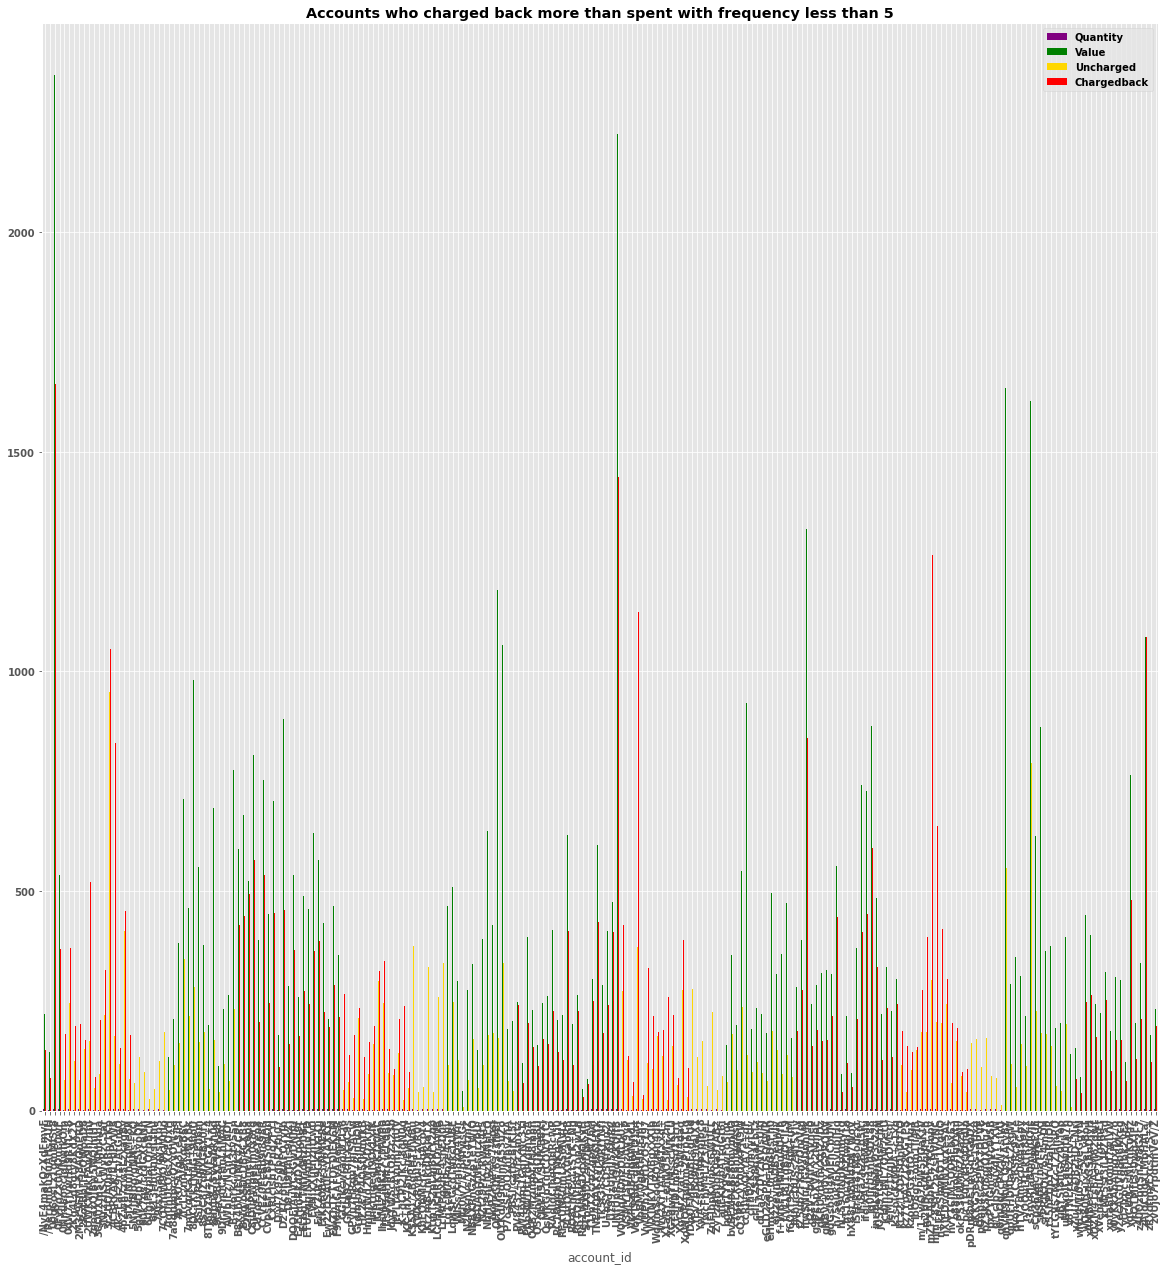

In [707]:
tableAccountChargedBack = tableAccountID.copy()
tableAccountChargedBack = tableAccountChargedBack[tableAccountChargedBack.chargedback_value > tableAccountChargedBack.unchargedback_value]
tableAccountChargedBack20 = tableAccountChargedBack[tableAccountChargedBack.quantity > 20]
tableAccountChargedBack1020 = tableAccountChargedBack[((tableAccountChargedBack.quantity > 10) & (tableAccountChargedBack.quantity < 20))]
tableAccountChargedBack0510 = tableAccountChargedBack[((tableAccountChargedBack.quantity > 5) & (tableAccountChargedBack.quantity < 10))]
tableAccountChargedBack05 = tableAccountChargedBack[(tableAccountChargedBack.quantity < 5)]

colors = ['purple', 'green','gold','red']
labels=['Quantity', 'Value', 'Uncharged', 'Chargedback']
plotBarChart(tableAccountChargedBack20,labels,'Accounts who charged back more than spent with frequency above 20',colors)
plotBarChart(tableAccountChargedBack1020,labels,'Accounts who charged back more than spent with frequency between 10 and 20',colors)
plotBarChart(tableAccountChargedBack0510,labels,'Accounts who charged back more than spent with frequency between 5 and 10',colors)
plotBarChart(tableAccountChargedBack05,labels,'Accounts who charged back more than spent with frequency less than 5',colors)

## Análise de tempo das transações

Aqui iremos fazer alguns tratamentos referente a coluna de timestamp e correlacionar a mesma com as transações da base.

In [708]:
paymentDateTime = paymentTable.copy()
dfTransactionsDateChargedBack = paymentDateTime.loc[((paymentDateTime['datetime'].dt.year >= 2021))
                     & (paymentDateTime['datetime'].dt.year < 2022) & (paymentDateTime['datetime'].dt.month != 4) ]
dfTransactionsDateTotal = paymentDateTime.loc[((paymentDateTime['datetime'].dt.year >= 2021))
                     & (paymentDateTime['datetime'].dt.year < 2022)]
dfMonthChargedBack = dfTransactionsDateChargedBack.where(dfTransactionsDateChargedBack.chargedback == '1.0')['datetime'].groupby(dfTransactionsDateChargedBack.datetime.dt.to_period("M")).agg('count')
dfMonthTotal = dfTransactionsDateTotal['datetime'].groupby(dfTransactionsDateTotal.datetime.dt.to_period("M")).agg('count')

## Total de transações por mês

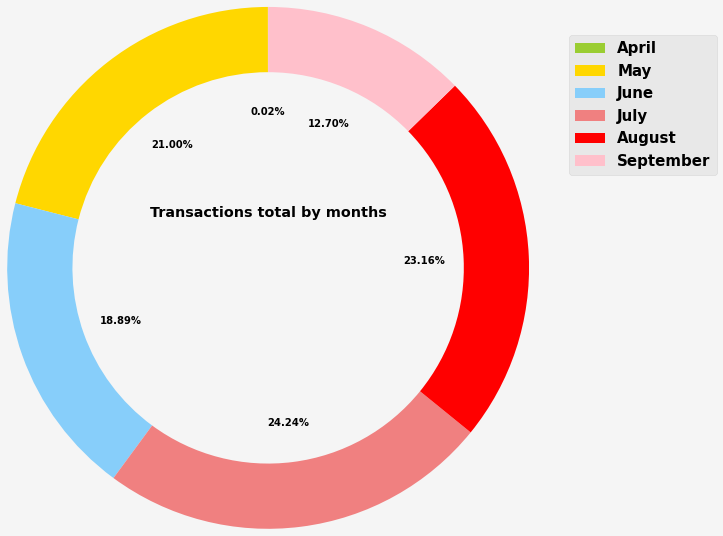

In [709]:
labelsMonths = 'April', 'May', 'June', 'July', 'August', 'September'
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red', 'pink']
plotPieChart('Transactions total by months', dfMonthTotal, labelsMonths, colors)


## Total de transações que possuem reembolso por mês

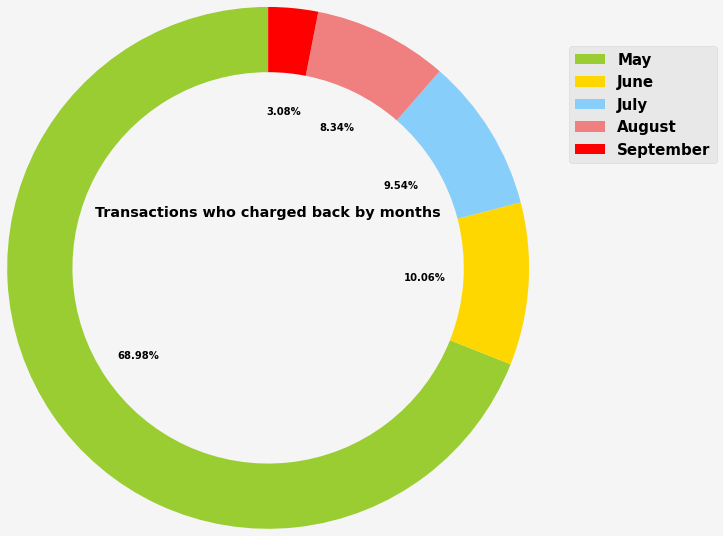

In [710]:

labelsMonths = 'May', 'June', 'July', 'August', 'September'
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red']
plotPieChart('Transactions who charged back by months', dfMonthChargedBack, labelsMonths, colors)

## Total do valor somado das transações por mês

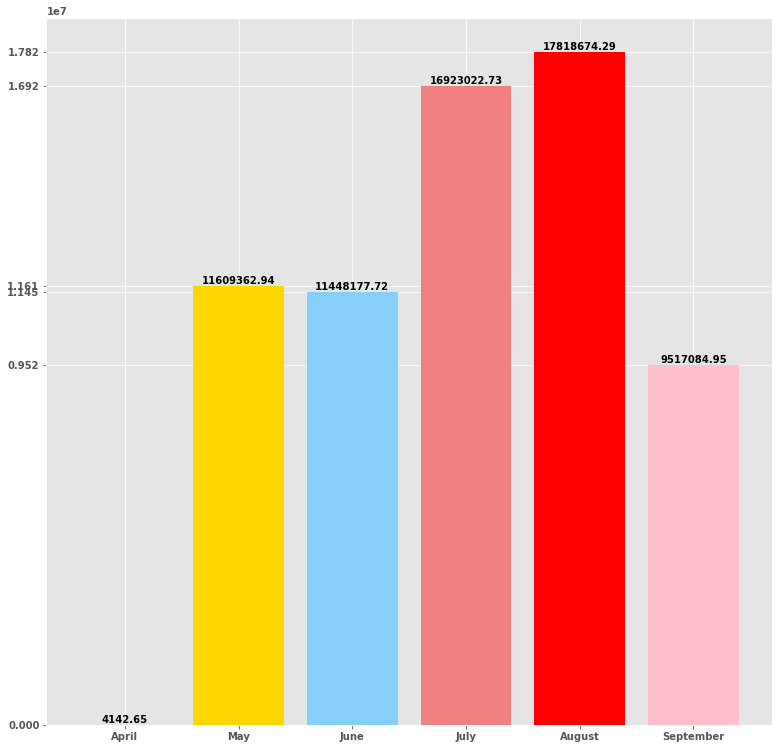

In [711]:
dateTransactionValue = dfTransactionsDateTotal.groupby(dfTransactionsDateTotal.datetime.dt.to_period("M"))['value'].sum().to_frame('sumvalue').reset_index().set_index('datetime')
labelsMonths = ['April', 'May', 'June', 'July', 'August', 'September']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red', 'pink']
top=[('April',dateTransactionValue.sumvalue[0]),('May',dateTransactionValue.sumvalue[1]),('June',dateTransactionValue.sumvalue[2]),('July',dateTransactionValue.sumvalue[3]),('August',dateTransactionValue.sumvalue[4]),('September',dateTransactionValue.sumvalue[5])]
plotBarChartList(top,'', colors)

## Total do valor das transações que tiveram reembolso por mês

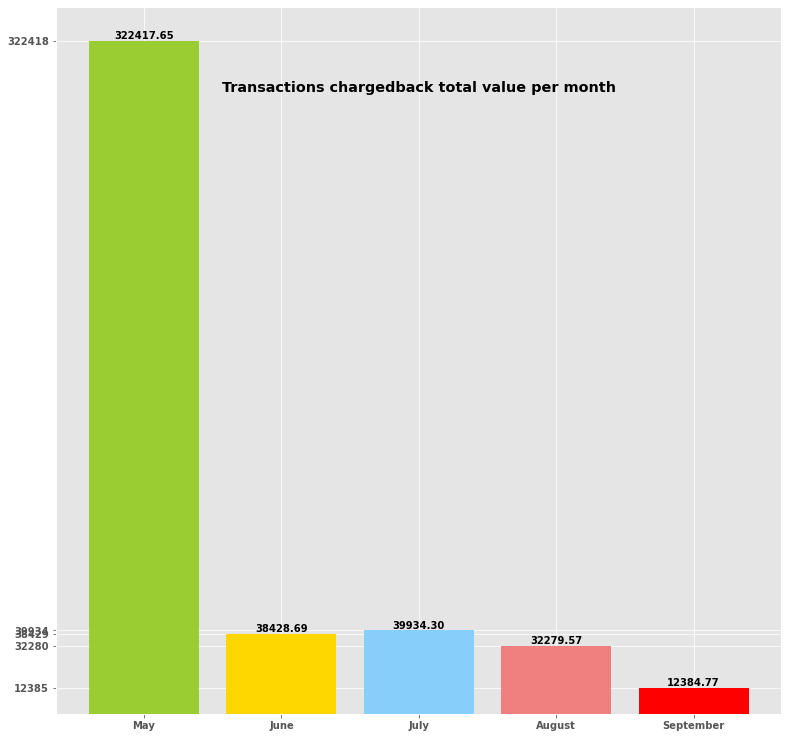

In [712]:
dateTransactionValue = dfTransactionsDateChargedBack.where(dfTransactionsDateChargedBack.chargedback == '1.0').groupby(dfTransactionsDateChargedBack.datetime.dt.to_period("M"))['value'].sum().to_frame('sumvalue').reset_index().set_index('datetime')
labelsMonths = ['April', 'May', 'June', 'July', 'August', 'September']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red', 'pink']
top=[('May',dateTransactionValue.sumvalue[0]),('June',dateTransactionValue.sumvalue[1]),('July',dateTransactionValue.sumvalue[2]),('August',dateTransactionValue.sumvalue[3]),('September',dateTransactionValue.sumvalue[4])]
plotBarChartList(top,'Transactions chargedback total value per month', colors)

## Idade dos dispositivos

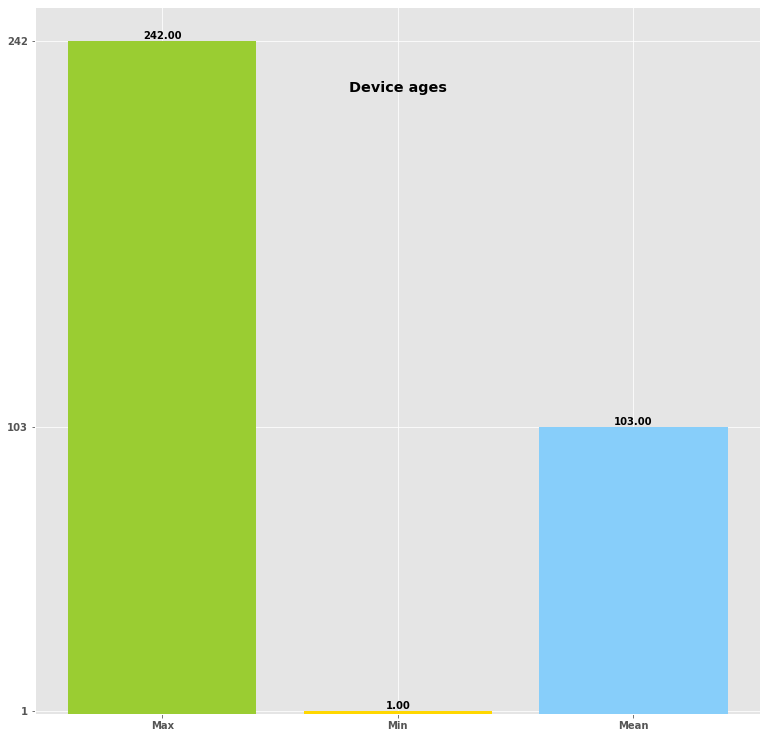

In [717]:
dfDeviceAge = paymentTable.loc[((paymentTable.device_age.dt.days >=1))]
dfDeviceDaysGroup = dfDeviceAge['device_age'].groupby(dfDeviceAge.device_age.dt.days).agg('count').to_frame('device_age_quantity').reset_index()
mean = dfDeviceAge.device_age.mean()
max = dfDeviceAge.device_age.max()
min = dfDeviceAge.device_age.min()
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red', 'pink']
top=[('Max',max.days),('Min',min.days),('Mean',mean.days)]
plotBarChartList(top, 'Device ages', colors)

## Total de transações por idade dos dispositivos

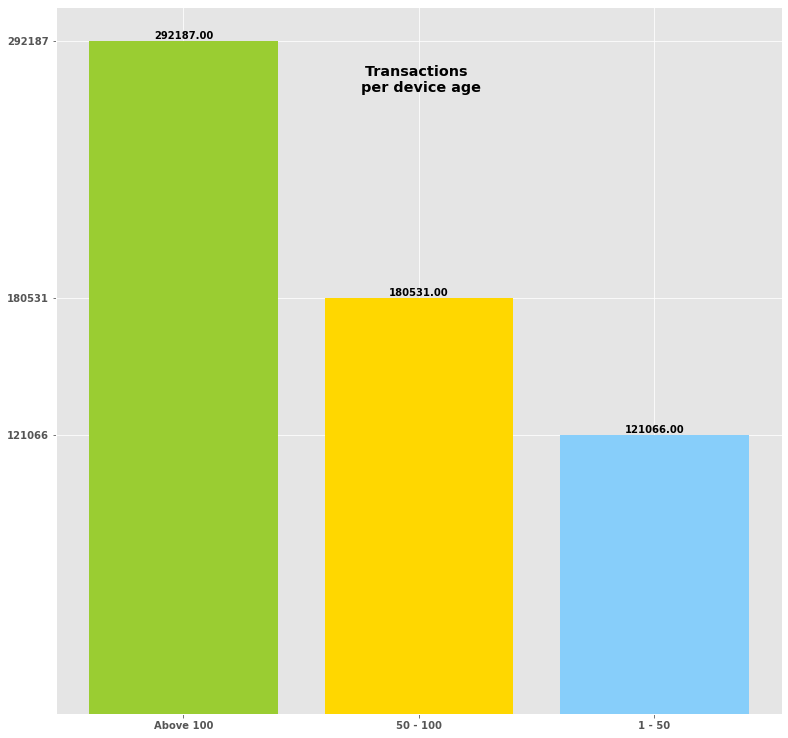

In [718]:
deviceAgeChargedback100 = dfDeviceAge.where((dfDeviceAge.device_age.dt.days >= 100))['id'].count()
deviceAgeChargedback5010 = dfDeviceAge.where(((dfDeviceAge.device_age.dt.days >= 50 ) & (dfDeviceAge.device_age.dt.days < 100)))['id'].count()
deviceAgeChargedback0050 = dfDeviceAge.where(((dfDeviceAge.device_age.dt.days >= 1) & (dfDeviceAge.device_age.dt.days < 50)))['id'].count()
top=[('Above 100',deviceAgeChargedback100),('50 - 100',deviceAgeChargedback5010),('1 - 50',deviceAgeChargedback0050)]
plotBarChartList(top, 'Transactions \n per device age', colors)

## Total de transações que não reembolsaram por idade dos dispositivos

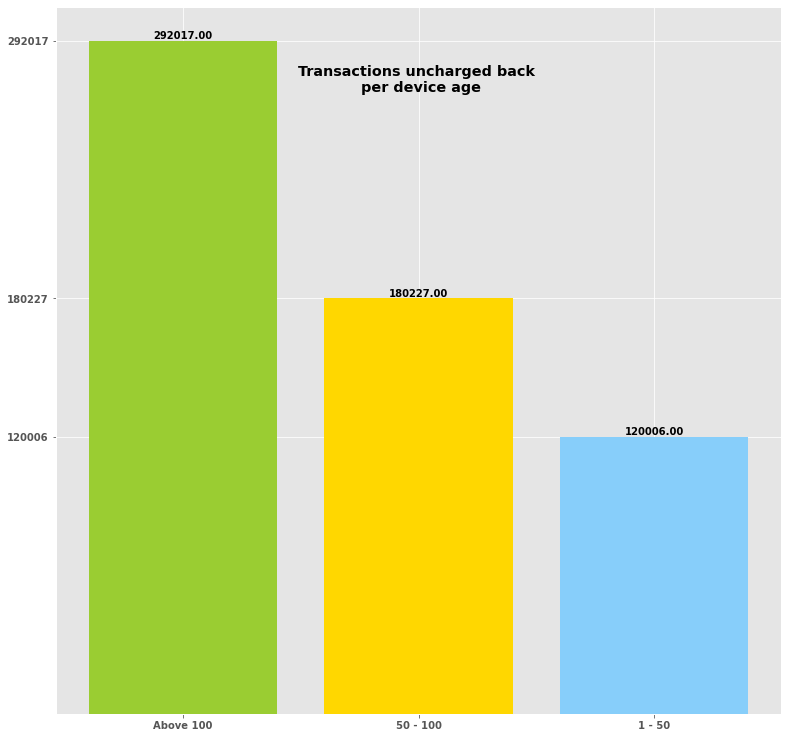

In [721]:
deviceAgeChargedback100 = dfDeviceAge.where((dfDeviceAge.chargedback == '0.0') & (dfDeviceAge.device_age.dt.days >= 100))['chargedback'].value_counts().to_frame('counts')
deviceAgeChargedback5010 = dfDeviceAge.where((dfDeviceAge.chargedback == '0.0') & ((dfDeviceAge.device_age.dt.days >= 50 ) & (dfDeviceAge.device_age.dt.days < 100)))['chargedback'].value_counts().to_frame('counts')
deviceAgeChargedback0050 = dfDeviceAge.where((dfDeviceAge.chargedback == '0.0') & ((dfDeviceAge.device_age.dt.days >= 1) & (dfDeviceAge.device_age.dt.days < 50)))['chargedback'].value_counts().to_frame('counts')
top=[('Above 100',deviceAgeChargedback100.counts[0]),('50 - 100',deviceAgeChargedback5010.counts[0]),('1 - 50',deviceAgeChargedback0050.counts[0])]
plotBarChartList(top, 'Transactions uncharged back \n per device age', colors)

## Total de transações com reembolso por idade dos dispositivos

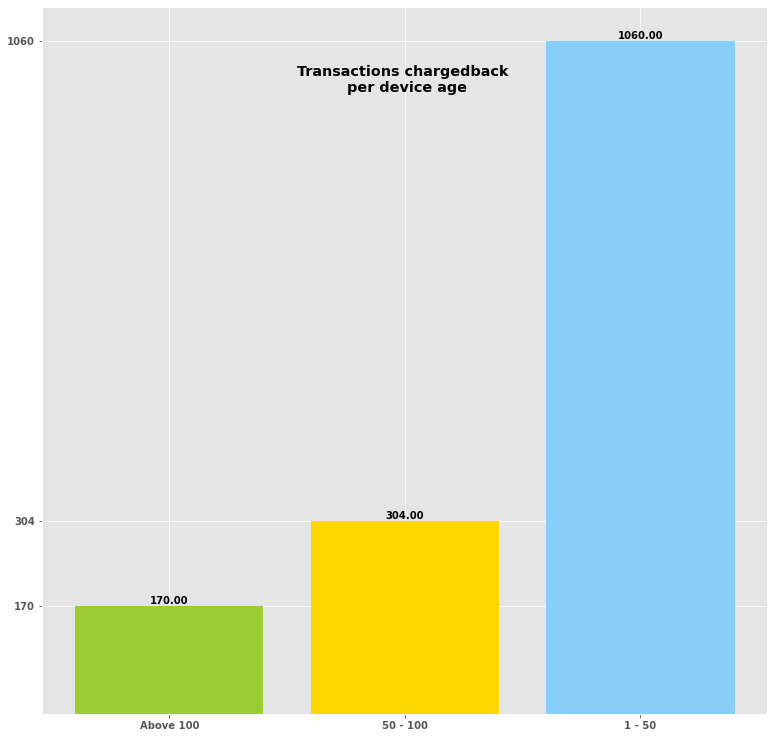

In [722]:
deviceAgeChargedback100 = dfDeviceAge.where((dfDeviceAge.chargedback == '1.0') & (dfDeviceAge.device_age.dt.days >= 100))['chargedback'].value_counts().to_frame('counts')
deviceAgeChargedback5010 = dfDeviceAge.where((dfDeviceAge.chargedback == '1.0') & ((dfDeviceAge.device_age.dt.days >= 50 ) & (dfDeviceAge.device_age.dt.days < 100)))['chargedback'].value_counts().to_frame('counts')
deviceAgeChargedback0050 = dfDeviceAge.where((dfDeviceAge.chargedback == '1.0') & ((dfDeviceAge.device_age.dt.days >= 1) & (dfDeviceAge.device_age.dt.days < 50)))['chargedback'].value_counts().to_frame('counts')
top=[('Above 100',deviceAgeChargedback100.counts[0]),('50 - 100',deviceAgeChargedback5010.counts[0]),('1 - 50',deviceAgeChargedback0050.counts[0])]
plotBarChartList(top, 'Transactions chargedback \n per device age', colors)